In [7]:
import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Omni Vehicle

In [82]:
n = 5
nActual = n
N = 3
NActual = N

In [83]:
platform_center = ['m.platform.OutPort.r[1]', 'm.platform.OutPort.r[2]', 'm.platform.OutPort.r[3]']

wheel_centers = [
    ['m.wheels[{0}].wheel.OutPortK.r[1]'.format(i), 'm.wheels[{0}].wheel.OutPortK.r[2]'.format(i), 'm.wheels[{0}].wheel.OutPortK.r[3]'.format(i)]
    for i in range(1, NActual + 1)
]

roller_centers = [
    ['m.wheels[{0}].wheel.Rollers[{1}].OutPort.r[1]'.format(i, j), 'm.wheels[{0}].wheel.Rollers[{1}].OutPort.r[2]'.format(i, j), 'm.wheels[{0}].wheel.Rollers[{1}].OutPort.r[3]'.format(i, j)]
    for i in range(1, NActual + 1)
    for j in range(1, nActual + 1)
]

centers = [ platform_center ] + wheel_centers + roller_centers

In [84]:
res = None

In [92]:
%%time
print(datetime.datetime.now())
res = pd.read_csv(
    '/home/vf/om/models/omni/test/out/MbsLite.Test.Omni.OmniVehicleTest_res.csv'
    # '/home/vf/om/models/omni/tmp/MbsLite.Test.Omni.OmniVehicleTest_res.csv'
    # , skiprows = 4000
    # , nrows=3000
)
print(len(res))

2018-10-21 20:14:38.889358
2584
CPU times: user 12.2 s, sys: 704 ms, total: 12.9 s
Wall time: 29.9 s


In [86]:
len(res)

392

Behold!


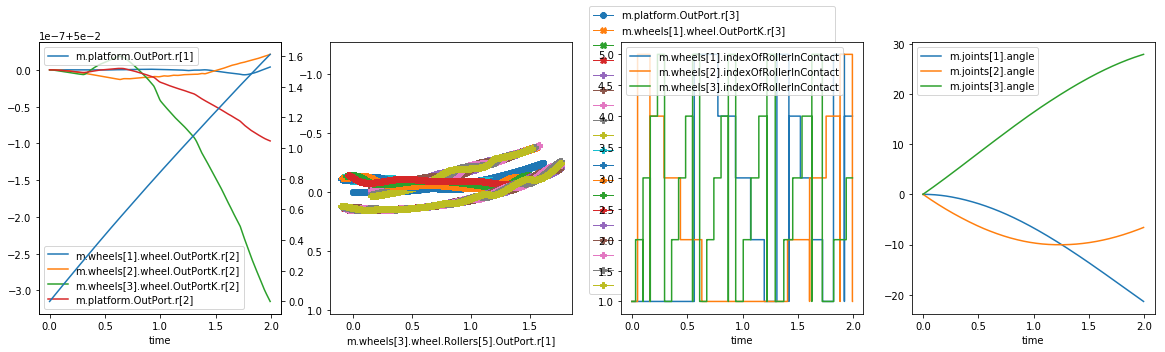

In [93]:
fig, axs = plt.subplots(1, 4, figsize = (20, 5))

wheels_r2 = res[
    [ 'time'
    , 'm.wheels[1].wheel.OutPortK.r[2]'
    , 'm.wheels[2].wheel.OutPortK.r[2]'
    , 'm.wheels[3].wheel.OutPortK.r[2]'
    , 'm.platform.OutPort.r[2]'
    ]
]

platform_r2 = res[
    [ 'time'
    , 'm.platform.OutPort.r[1]'
    ]
]

platform_center_df = [
    res[
        [ center[0], center[2] ]
    ]
    for center in [ platform_center ]
]
wheel_centers_dfs = [
    res[
        [ center[0], center[2] ]
    ]
    for center in wheel_centers
]
roller_centers_dfs = [
    res[
        [ center[0], center[2] ]
    ]
    for center in roller_centers
]

index_of_roller_in_contact = res[
    [ 'time'
    , 'm.wheels[1].indexOfRollerInContact'
    , 'm.wheels[2].indexOfRollerInContact'
    , 'm.wheels[3].indexOfRollerInContact'
    ]
]

wheels_r2.plot(x = 'time', ax = axs[0])
ax1 = axs[0].twinx()
platform_r2.plot(x = 'time', ax = ax1)

trajectory_axs = axs[1]
trajectory_axs.axis('equal')
trajectory_axs.invert_yaxis() # userward goes downward when looking from top
for i, center in enumerate([ platform_center ]):
    platform_center_df[i].plot(x = center[0], ax = trajectory_axs, linewidth = 1, marker = '8')
for i, center in enumerate(wheel_centers):
    wheel_centers_dfs[i].plot(x = center[0], ax = trajectory_axs, linewidth = 1, marker = 'X')
for i, center in enumerate(roller_centers):
    roller_centers_dfs[i].plot(x = center[0], ax = trajectory_axs, linewidth = 1, marker = 'P')
trajectory_axs.legend(bbox_to_anchor=(1.05, 1.15))

index_of_roller_in_contact.plot(x = 'time', ax = axs[2])

res[
    [ 'time'
    , 'm.joints[1].angle'
    , 'm.joints[2].angle'
    , 'm.joints[3].angle'
    ]
].plot(x = 'time', ax = axs[3])

print('Behold!')

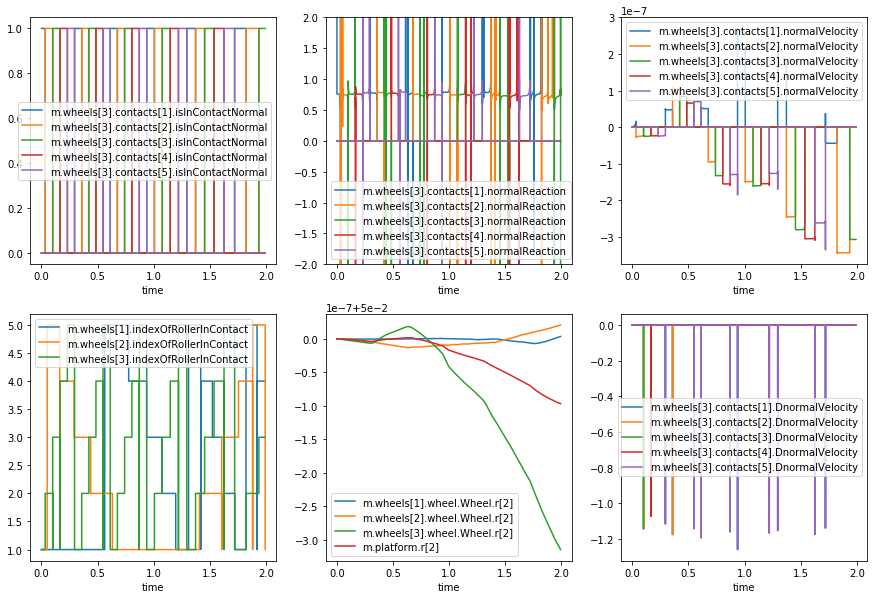

In [94]:
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

this_res = res.iloc[
#     33:44
#     198:209
    :
]

this_res[
    [ 'time'
    , 'm.wheels[3].contacts[1].isInContactNormal'
    , 'm.wheels[3].contacts[2].isInContactNormal'
    , 'm.wheels[3].contacts[3].isInContactNormal'
    , 'm.wheels[3].contacts[4].isInContactNormal'
    , 'm.wheels[3].contacts[5].isInContactNormal'
    ]
].plot(x = 'time', ax = axs[0,0])

axs[0,1].set_ylim(-2, 2)
this_res[
    [ 'time'
    , 'm.wheels[3].contacts[1].normalReaction'
    , 'm.wheels[3].contacts[2].normalReaction'
    , 'm.wheels[3].contacts[3].normalReaction'
    , 'm.wheels[3].contacts[4].normalReaction'
    , 'm.wheels[3].contacts[5].normalReaction'
    ]
].plot(x = 'time', ax = axs[0,1])

this_res[
    [ 'time'
    , 'm.wheels[3].contacts[1].normalVelocity'
    , 'm.wheels[3].contacts[2].normalVelocity'
    , 'm.wheels[3].contacts[3].normalVelocity'
    , 'm.wheels[3].contacts[4].normalVelocity'
    , 'm.wheels[3].contacts[5].normalVelocity'
    ]
].plot(x = 'time', ax = axs[0,2])

this_res[
    [ 'time'
    , 'm.wheels[1].indexOfRollerInContact'
    , 'm.wheels[2].indexOfRollerInContact'
    , 'm.wheels[3].indexOfRollerInContact'
    ]
].plot(x = 'time', ax = axs[1,0])

this_res[
    [ 'time'
    , 'm.wheels[1].wheel.Wheel.r[2]'
    , 'm.wheels[2].wheel.Wheel.r[2]'
    , 'm.wheels[3].wheel.Wheel.r[2]'
    , 'm.platform.r[2]'
    ]
].plot(x = 'time', ax = axs[1,1])

this_res[
    [ 'time'
    , 'm.wheels[3].contacts[1].DnormalVelocity'
    , 'm.wheels[3].contacts[2].DnormalVelocity'
    , 'm.wheels[3].contacts[3].DnormalVelocity'
    , 'm.wheels[3].contacts[4].DnormalVelocity'
    , 'm.wheels[3].contacts[5].DnormalVelocity'
    ]
].plot(x = 'time', ax = axs[1,2])

Behold!


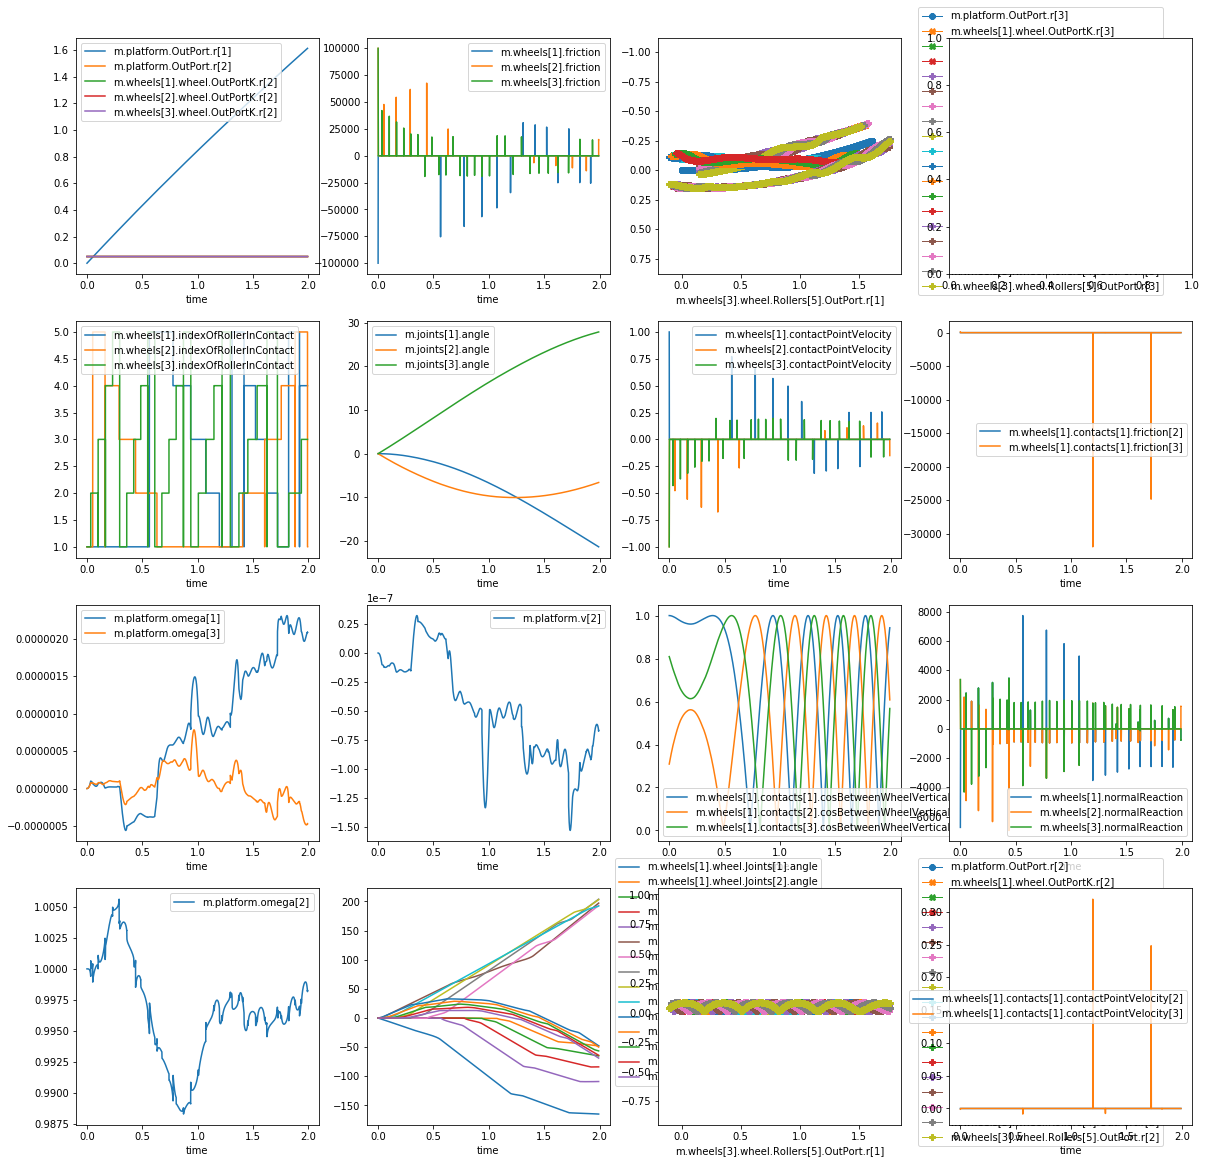

In [95]:
fig, axs = plt.subplots(4, 4, figsize = (20, 20))

wheels_r2 = res[
    [ 'time'
    , 'm.platform.OutPort.r[1]'
    , 'm.platform.OutPort.r[2]'
    , 'm.wheels[1].wheel.OutPortK.r[2]'
    , 'm.wheels[2].wheel.OutPortK.r[2]'
    , 'm.wheels[3].wheel.OutPortK.r[2]'
    ]
]

wheels_friction = res[
    [ 'time'
    , 'm.wheels[1].friction'
    , 'm.wheels[2].friction'
    , 'm.wheels[3].friction'
    ]
]

platform_center_df = [
    res[
        [ center[0], center[2] ]
    ]
    for center in [ platform_center ]
]
wheel_centers_dfs = [
    res[
        [ center[0], center[2] ]
    ]
    for center in wheel_centers
]
roller_centers_dfs = [
    res[
        [ center[0], center[2] ]
    ]
    for center in roller_centers
]

index_of_roller_in_contact = res[
    [ 'time'
    , 'm.wheels[1].indexOfRollerInContact'
    , 'm.wheels[2].indexOfRollerInContact'
    , 'm.wheels[3].indexOfRollerInContact'
    ]
]

joint_angles = res[
    [ 'time'
    , 'm.joints[1].angle'
    , 'm.joints[2].angle'
    , 'm.joints[3].angle'
    ]
]

contact_point_velocities = res[
    [ 'time'
    , 'm.wheels[1].contactPointVelocity'
    , 'm.wheels[2].contactPointVelocity'
    , 'm.wheels[3].contactPointVelocity'
    ]
]

contacts_friction = res[
    [ 'time'
#     , 'm.wheels[1].contacts[1].friction[1]'
    , 'm.wheels[1].contacts[1].friction[2]'
    , 'm.wheels[1].contacts[1].friction[3]'
    ]
]

wheel_1_contact_point_velocity = res[
    [ 'time'
#     , 'm.wheels[1].contacts[1].contactPointVelocity[1]'
    , 'm.wheels[1].contacts[1].contactPointVelocity[2]'
    , 'm.wheels[1].contacts[1].contactPointVelocity[3]'
    ]
]

# normal_velocities = res[
#     [ 'time'
#     , 'm.wheels[1].normalVelocity'
#     , 'm.wheels[2].normalVelocity'
#     , 'm.wheels[3].normalVelocity'
#     ]
# ]

normal_reactions = res[
    [ 'time'
    , 'm.wheels[1].normalReaction'
    , 'm.wheels[2].normalReaction'
    , 'm.wheels[3].normalReaction'
    ]
]

platform_v_2 = res[
    [ 'time'
    , 'm.platform.v[2]'
    ]
]

platform_omega = res[
    [ 'time'
    , 'm.platform.omega[1]'
    , 'm.platform.omega[3]'
    ]
]

platform_omega_2 = res[
    [ 'time'
    , 'm.platform.omega[2]'
    ]
]

roller_angles = res[
    [ 'time' ]
    + 
    [ 'm.wheels[{0}].wheel.Joints[{1}].angle'.format(i, j)
    for i in range(1, NActual + 1)
    for j in range(1, nActual + 1)    
    ]
]

num_tail = 5000000

wheels_r2.tail(num_tail).plot(x = 'time', ax = axs[0][0])

wheels_friction.tail(num_tail).plot(x = 'time', ax = axs[0][1])

trajectory_axs = axs[0][2]
trajectory_axs.axis('equal')
trajectory_axs.invert_yaxis() # userward goes downward when looking from top
for i, center in enumerate([ platform_center ]):
    platform_center_df[i].tail(num_tail).plot(x = center[0], ax = trajectory_axs, linewidth = 1, marker = '8')
for i, center in enumerate(wheel_centers):
    wheel_centers_dfs[i].tail(num_tail).plot(x = center[0], ax = trajectory_axs, linewidth = 1, marker = 'X')
for i, center in enumerate(roller_centers):
    roller_centers_dfs[i].tail(num_tail).plot(x = center[0], ax = trajectory_axs, linewidth = 1, marker = 'P')
trajectory_axs.legend(bbox_to_anchor=(1.05, 1.15))

index_of_roller_in_contact.tail(num_tail).plot(x = 'time', ax = axs[1][0])

joint_angles.tail(num_tail).plot(x = 'time', ax = axs[1][1])

contact_point_velocities.tail(num_tail).plot(x = 'time', ax = axs[1][2])

contacts_friction.tail(num_tail).plot(x = 'time', ax = axs[1][3])

wheel_1_contact_point_velocity.tail(num_tail).plot(x = 'time', ax = axs[3][3])

# normal_velocities.plot(x = 'time', ax = axs[2][2])

res.tail(num_tail)[
    [ 'time'
    , 'm.wheels[1].contacts[1].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[1].contacts[2].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[1].contacts[3].cosBetweenWheelVerticalAndGlobalVertical'
    ]
].plot(x = 'time', ax = axs[2][2])

normal_reactions.tail(num_tail).plot(x = 'time', ax = axs[2][3])

platform_v_2.tail(num_tail).plot(x = 'time', ax = axs[2][1])

platform_omega.tail(num_tail).plot(x = 'time', ax = axs[2][0])

platform_omega_2.tail(num_tail).plot(x = 'time', ax = axs[3][0])

v_trajectory_axs = axs[3][2]
v_trajectory_axs.axis('equal')
for center in [ platform_center ]:
    res.tail(num_tail)[
        [ center[0], center[1] ]
    ].plot(x = center[0], ax = v_trajectory_axs, linewidth = 1, marker = '8')
for center in wheel_centers:
    res.tail(num_tail)[
        [ center[0], center[1] ]
    ].plot(x = center[0], ax = v_trajectory_axs, linewidth = 1, marker = 'X')
for center in roller_centers:
    res.tail(num_tail)[
        [ center[0], center[1] ]
    ].plot(x = center[0], ax = v_trajectory_axs, linewidth = 1, marker = 'P')
v_trajectory_axs.legend(bbox_to_anchor=(1.05, 1.15))

roller_angles.tail(num_tail).plot(x = 'time', ax = axs[3][1])
axs[3][1].legend(bbox_to_anchor=(1.0, 1.15))

print('Behold!')

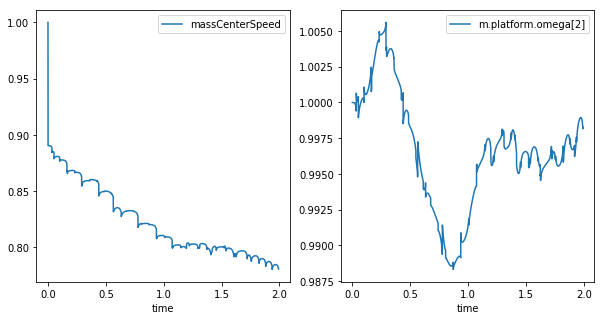

In [96]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

res[
    [ 'time'
    ]
].assign(massCenterSpeed = res[
    [ 'm.platform.v[1]'
    , 'm.platform.v[3]'
    ]
].apply(
    lambda row: np.sqrt(np.dot(row, row)),
    axis = 1
)).plot(x = 'time', ax = axs[0])

res[
    [ 'time'
    , 'm.platform.omega[2]'
    ]
].plot(x = 'time', ax = axs[1])

# Plot stuff

### Pendulum

In [216]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.PendulumTest_res.csv')

In [217]:
res.columns.tolist()

['time',
 'p.body.Active',
 'p.body.omega[1]',
 'p.body.omega[2]',
 'p.body.omega[3]',
 'p.body.q[1]',
 'p.body.q[2]',
 'p.body.q[3]',
 'p.body.q[4]',
 'p.body.r[1]',
 'p.body.r[2]',
 'p.body.r[3]',
 'p.joint.angle',
 'p.joint.mu',
 'der(p.body.Active)',
 'der(p.body.omega[1])',
 'der(p.body.omega[2])',
 'der(p.body.omega[3])',
 'der(p.body.q[1])',
 'der(p.body.q[2])',
 'der(p.body.q[3])',
 'der(p.body.q[4])',
 'der(p.body.r[1])',
 'der(p.body.r[2])',
 'der(p.body.r[3])',
 'der(p.joint.angle)',
 'der(p.joint.mu)',
 'der(p.body.OutPort.omega[1])',
 'der(p.body.OutPort.omega[2])',
 'der(p.body.OutPort.omega[3])',
 'der(p.body.T[1,1])',
 'der(p.body.T[1,2])',
 'der(p.body.T[1,3])',
 'der(p.body.T[2,1])',
 'der(p.body.T[2,2])',
 'der(p.body.T[2,3])',
 'der(p.body.T[3,1])',
 'der(p.body.T[3,2])',
 'der(p.body.T[3,3])',
 'der(p.body.v[1])',
 'der(p.body.v[2])',
 'der(p.body.v[3])',
 'der(p.joint.RB[1])',
 'der(p.joint.RB[2])',
 'der(p.joint.RB[3])',
 'p.F[1]',
 'p.F[2]',
 'p.F[3]',
 'p.M[1]'

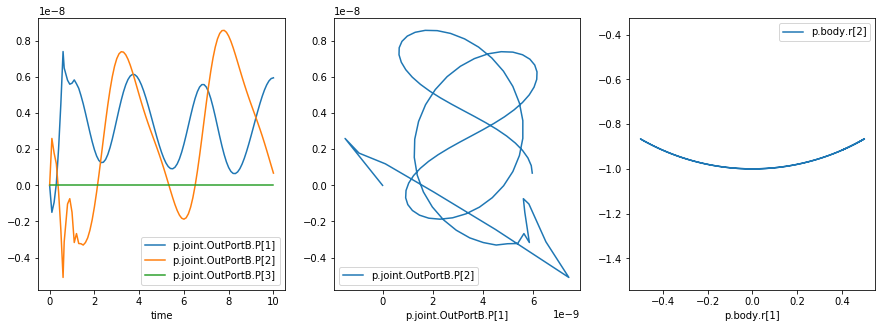

In [226]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

res[
    [ 'time'
    , 'p.joint.OutPortB.P[1]'
    , 'p.joint.OutPortB.P[2]'
    , 'p.joint.OutPortB.P[3]'
    ]
].plot(x = 'time', ax = axs[0])

res[
    [ 'p.joint.OutPortB.P[1]'
    , 'p.joint.OutPortB.P[2]'
    ]
].plot(x = 'p.joint.OutPortB.P[1]', ax = axs[1])

axs[2].axis('equal')
res[
    [ 'p.body.r[1]'
    , 'p.body.r[2]'
    ]
].plot(x = 'p.body.r[1]', ax = axs[2])

### Double Pendulum

In [241]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.DoublePendulumTest_res.csv')

In [80]:
res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.DoublePendulumTest_res.csv')
len(res)

1003

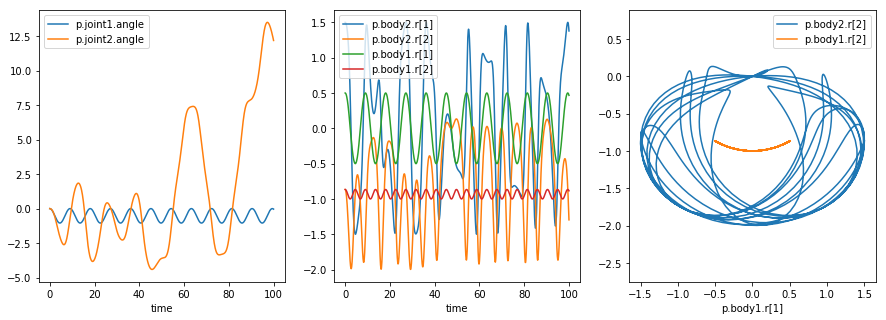

In [93]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

res[
    [ 'time'
    , 'p.joint1.angle'
    , 'p.joint2.angle'
    ]
].plot(x = 'time', ax = axs[0])

res[
    [ 'time'
    , 'p.body2.r[1]'
    , 'p.body2.r[2]'
    , 'p.body1.r[1]'
    , 'p.body1.r[2]'
    ]
].plot(x = 'time', ax = axs[1])

axs[2].axis('equal')
num = len(res)
res.head(num)[
    [ 'p.body2.r[1]'
    , 'p.body2.r[2]'
    ]
].plot(x = 'p.body2.r[1]', ax = axs[2])
res.head(num)[
    [ 'p.body1.r[1]'
    , 'p.body1.r[2]'
    ]
].plot(x = 'p.body1.r[1]', ax = axs[2])

### Single body rolling

In [243]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.SingleBodyRollingTest_res.csv')

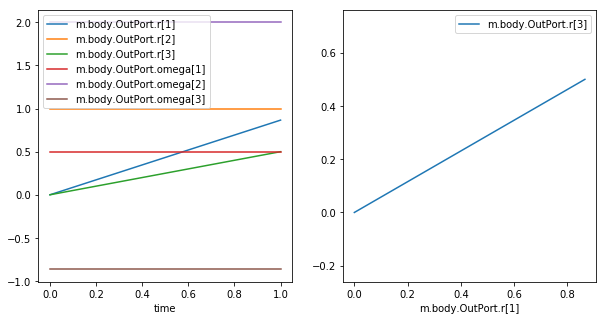

In [244]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

res[
    [ 'time'
    , 'm.body.OutPort.r[1]'
    , 'm.body.OutPort.r[2]'
    , 'm.body.OutPort.r[3]'
    , 'm.body.OutPort.omega[1]'
    , 'm.body.OutPort.omega[2]'
    , 'm.body.OutPort.omega[3]'
    ]
].plot(x = 'time', ax = ax1)

ax2.axis('equal')
res[
    [ 'm.body.OutPort.r[1]'
    , 'm.body.OutPort.r[3]'
    ]
].plot(x = 'm.body.OutPort.r[1]', ax = ax2)

### Omni-wheel without contacts and gravity

##### Cleanup

In [2]:
# !rm /home/vf/om/models/omni/test/out/MbsLite.Test.SingleRollerOmniWheelTest*

#### Calc

In [96]:
res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.Omni.OmniWheelAtRestTest_res.csv')

In [97]:
# res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.Omni.OmniWheelAtRestTest_res.csv')

In [98]:
n = 5

In [70]:
print(len(res))
res.head()

10002


time  m.wheel.Joints[1].angle  m.wheel.Joints[2].angle  \
0  0.00                 0.000000                 0.000000   
1  0.01                -0.000050                -0.000016   
2  0.02                -0.000199                -0.000063   
3  0.03                -0.000448                -0.000143   
4  0.04                -0.000797                -0.000256   

   m.wheel.Joints[3].angle  m.wheel.Joints[4].angle  m.wheel.Joints[5].angle  \
0                 0.000000                 0.000000                 0.000000   
1                 0.000040                 0.000040                -0.000015   
2                 0.000160                 0.000162                -0.000060   
3                 0.000360                 0.000365                -0.000134   
4                 0.000638                 0.000651                -0.000236   

   m.wheel.Joints[1].mu  m.wheel.Joints[2].mu  m.wheel.Joints[3].mu  \
0              0.000000              0.000000              0.000000   
1             -0.009961             -0.003125              0.008030   
2             -0.019921             -0.006344              0.016000   
3             -0.029879             -0.009656              0.023912   
4             -0.039834             -0.013060              0.031762   

   m.wheel.Joints[4].mu          ...           m.wheel.Wheel.OutPort.omega[3]  \
0              0.000000          ...                                 1.000000   
1              0.008088          ...                                 1.000050   
2              0.016232          ...                                 1.000199   
3              0.024434          ...                                 1.000447   
4              0.032691          ...                                 1.000794   

   m.wheel.Wheel.OutPort.r[1]  m.wheel.Wheel.OutPort.r[2]  \
0                0.000000e+00                        0.05   
1               -4.494471e-22                        0.05   
2               -4.249835e-21                        0.05   
3               -2.411666e-20                        0.05   
4               -5.834107e-20                        0.05   

   m.wheel.Wheel.OutPort.r[3]  m.wheel.Wheel.OutPort.v[1]  \
0                0.000000e+00                0.000000e+00   
1                1.626031e-21               -1.894120e-19   
2                1.306946e-20               -9.128352e-19   
3                4.413137e-20               -3.058986e-18   
4                9.294437e-20               -3.546574e-18   

   m.wheel.Wheel.OutPort.v[2]  m.wheel.Wheel.OutPort.v[3]  \
0                0.000000e+00                0.000000e+00   
1               -8.033009e-18                8.247449e-19   
2               -9.866000e-18                1.883020e-18   
3               -1.233398e-17                4.315798e-18   
4               -1.339644e-17                5.412463e-18   

   m.wheel.Wheel.T[1,1]  m.wheel.Wheel.T[2,1]  m.wheel.Wheel.T[3,1]  
0              1.000000              0.000000              0.000000  
1              0.999900              0.010000             -0.010000  
2              0.999600              0.019996             -0.019997  
3              0.999100              0.029987             -0.029991  
4              0.998401              0.039968             -0.039979  

[5 rows x 1180 columns]

In [71]:
df = res[
    [ 'time'
    , 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[1,2]'
    , 'm.wheel.OutPortK.T[1,3]'
    ]
]
df = df.assign(
    **{ 'm.selfRot' : df.apply(lambda row:
        ( np.arccos(row['m.wheel.OutPortK.T[1,1]'])
        if row['m.wheel.OutPortK.T[1,2]'] >= 0 else
#         np.arccos(row['m.wheel.OutPortK.T[1,1]'])
        2 * np.pi - np.arccos(row['m.wheel.OutPortK.T[1,1]'])
        ) * 180/np.pi
        , axis = 1
        )
      }
)
df.head()

time  m.wheel.OutPortK.T[1,1]  m.wheel.OutPortK.T[1,2]  \
0  0.00                 1.000000                     0.00   
1  0.01                 0.999900                    -0.01   
2  0.02                 0.999600                    -0.02   
3  0.03                 0.999100                    -0.03   
4  0.04                 0.998401                    -0.04   

   m.wheel.OutPortK.T[1,3]   m.selfRot  
0                 0.000000    0.000000  
1                 0.009999  359.189722  
2                 0.019993  358.379484  
3                 0.029978  357.569326  
4                 0.039947  356.759289

In [72]:
tmp = pd.DataFrame(
    { 'time'   : np.linspace(0, 4 * np.pi, 100)
    , 'cos'    : np.cos(np.linspace(0, 4 * np.pi, 100))
    , 'arccos' : np.arccos(np.cos(np.linspace(0, 4 * np.pi, 100)))
    }
)
tmp.head()

arccos       cos      time
0  0.000000  1.000000  0.000000
1  0.126933  0.991955  0.126933
2  0.253866  0.967949  0.253866
3  0.380799  0.928368  0.380799
4  0.507732  0.873849  0.507732

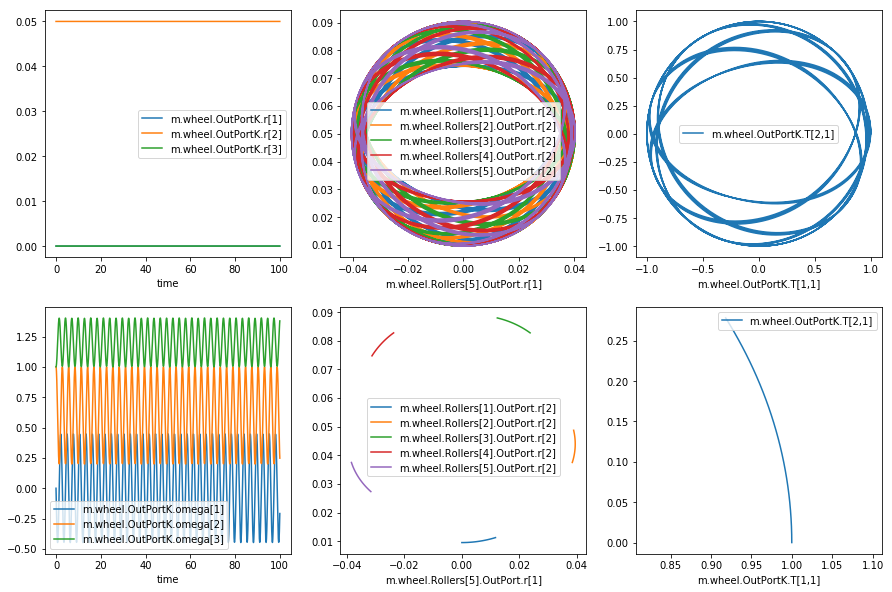

In [73]:
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

res[
    [ 'time'
    , 'm.wheel.OutPortK.r[1]'
    , 'm.wheel.OutPortK.r[2]'
    , 'm.wheel.OutPortK.r[3]'
    ]
].plot(x = 'time', ax = axs[0][0])

axs[0][1].axis('equal')
for i in range(n):
    res[
        [ 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
        ]
    ].plot(x = 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]', ax = axs[0][1])
axs[0][1].legend(bbox_to_anchor=(0.5, 0.65))

axs[0][2].axis('equal')
res[
    [ 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[2,1]'
    ]
].plot(x = 'm.wheel.OutPortK.T[1,1]', ax = axs[0][2])

res[
    [ 'time'
    , 'm.wheel.OutPortK.omega[1]'
    , 'm.wheel.OutPortK.omega[2]'
    , 'm.wheel.OutPortK.omega[3]'
    ]
].plot(x = 'time', ax = axs[1][0])

axs[1][1].axis('equal')
for i in range(n):
    res.head(30)[
        [ 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
        ]
    ].plot(x = 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]', ax = axs[1][1])
axs[1][1].legend(bbox_to_anchor=(0.5, 0.65))

axs[1][2].axis('equal')
res.head(30)[
    [ 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[2,1]'
    ]
].plot(x = 'm.wheel.OutPortK.T[1,1]', ax = axs[1][2])

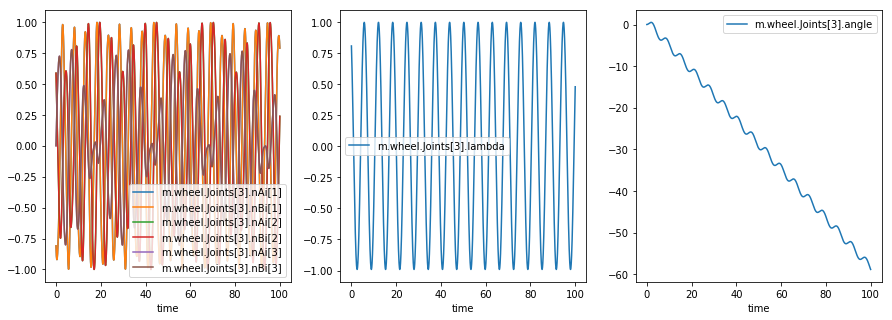

In [99]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

res[
    [ 'time'
    , 'm.wheel.Joints[3].nAi[1]'
    , 'm.wheel.Joints[3].nBi[1]'
    , 'm.wheel.Joints[3].nAi[2]'
    , 'm.wheel.Joints[3].nBi[2]'
    , 'm.wheel.Joints[3].nAi[3]'
    , 'm.wheel.Joints[3].nBi[3]'
    ]
].plot(x = 'time', ax = axs[0])

res[
    [ 'time'
    , 'm.wheel.Joints[3].lambda'
    ]
].plot(x = 'time', ax = axs[1])

res[
    [ 'time'
    , 'm.wheel.Joints[3].angle'
    ]
].plot(x = 'time', ax = axs[2])


In [75]:
res[
    [ 'time' 
    , 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[2,1]'
    ]
].tail(10)

time  m.wheel.OutPortK.T[1,1]  m.wheel.OutPortK.T[2,1]
9992    99.92                -0.377284                -0.530301
9993    99.93                -0.367888                -0.533312
9994    99.94                -0.358471                -0.536258
9995    99.95                -0.349033                -0.539141
9996    99.96                -0.339576                -0.541960
9997    99.97                -0.330098                -0.544716
9998    99.98                -0.320601                -0.547409
9999    99.99                -0.311085                -0.550041
10000  100.00                -0.301549                -0.552611
10001  100.00                -0.301549                -0.552611

### Explicitly modelled roller on plane with contact, constrained as if it were attached to a wheel

In [ ]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.Omni.RollerOnPlaneExplicitTest_res.csv')

In [1213]:
eres = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.Omni.RollerOnPlaneExplicitTest_res.csv')

In [1074]:
len(eres)

285

In [1075]:
n = 5
nActual = 5

behold please


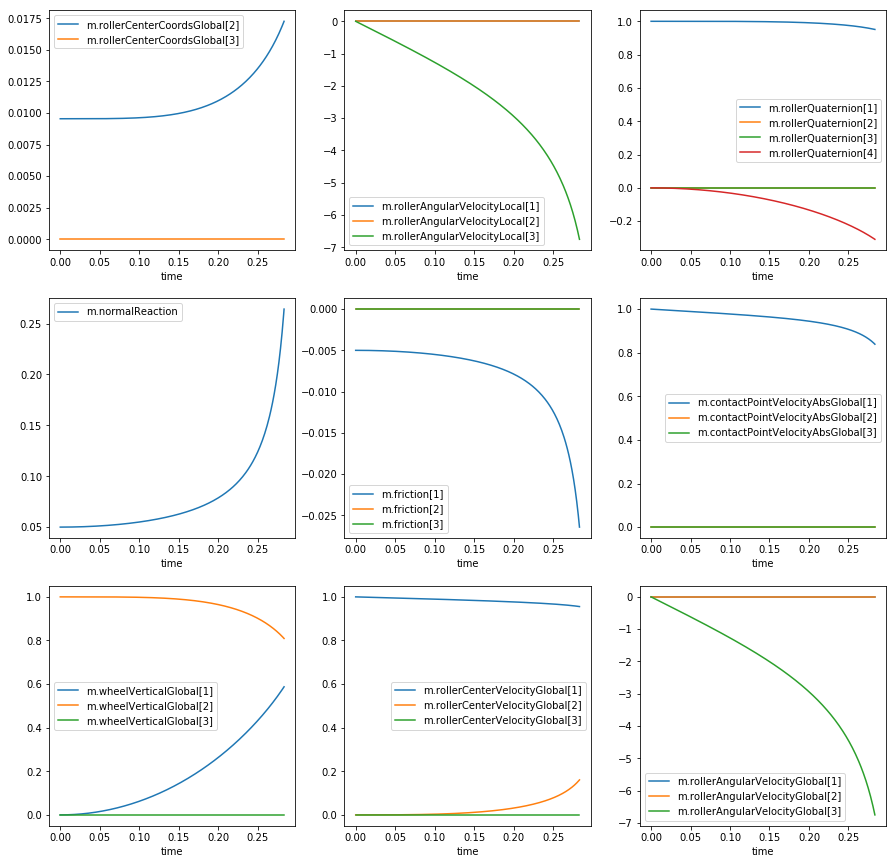

In [1214]:
fig, axs = plt.subplots(3, 3, figsize = (15, 15))

eres[
    [ 'time'
#     , 'm.rollerCenterCoordsGlobal[1]'
    , 'm.rollerCenterCoordsGlobal[2]'
    , 'm.rollerCenterCoordsGlobal[3]'
    ]
].plot(x = 'time', ax = axs[0][0])

eres[
    [ 'time'
    , 'm.rollerAngularVelocityLocal[1]'
    , 'm.rollerAngularVelocityLocal[2]'
    , 'm.rollerAngularVelocityLocal[3]'
    ]
].plot(x = 'time', ax = axs[0][1])

eres[
    [ 'time'
    , 'm.rollerQuaternion[1]'
    , 'm.rollerQuaternion[2]'
    , 'm.rollerQuaternion[3]'
    , 'm.rollerQuaternion[4]'
    ]
].plot(x = 'time', ax = axs[0][2])

eres[
    [ 'time'
    , 'm.normalReaction'
    ]
].plot(x = 'time', ax = axs[1][0])

eres[
    [ 'time'
    , 'm.friction[1]'
    , 'm.friction[2]'
    , 'm.friction[3]'
    ]
].plot(x = 'time', ax = axs[1][1])

eres[
    [ 'time'
    , 'm.contactPointVelocityAbsGlobal[1]'
    , 'm.contactPointVelocityAbsGlobal[2]'
    , 'm.contactPointVelocityAbsGlobal[3]'
    ]
].plot(x = 'time', ax = axs[1][2])

eres[
    [ 'time'
    , 'm.rollerCenterVelocityGlobal[1]'
    , 'm.rollerCenterVelocityGlobal[2]'
    , 'm.rollerCenterVelocityGlobal[3]'
    ]
].plot(x = 'time', ax = axs[2][1])

eres[
    [ 'time'
    , 'm.rollerAngularVelocityGlobal[1]'
    , 'm.rollerAngularVelocityGlobal[2]'
    , 'm.rollerAngularVelocityGlobal[3]'
    ]
].plot(x = 'time', ax = axs[2][2])

eres[
    [ 'time'
    , 'm.wheelVerticalGlobal[1]'
    , 'm.wheelVerticalGlobal[2]'
    , 'm.wheelVerticalGlobal[3]'
    ]
].plot(x = 'time', ax = axs[2][0])

print("behold please")

In [1215]:
eres[
    [ 'time'
    , 'm.rollerAngularAccelerationLocal[1]'
    , 'm.rollerAngularAccelerationLocal[2]'
    , 'm.rollerAngularAccelerationLocal[3]'
    ]
].head()

time  m.rollerAngularAccelerationLocal[1]  \
0  0.000                                    0   
1  0.001                                    0   
2  0.002                                    0   
3  0.003                                    0   
4  0.004                                    0   

   m.rollerAngularAccelerationLocal[2]  m.rollerAngularAccelerationLocal[3]  
0                                    0                           -12.293481  
1                                    0                           -12.293593  
2                                    0                           -12.293932  
3                                    0                           -12.294495  
4                                    0                           -12.295285

In [853]:
def QRot(angle, axis):
    s = np.sin(angle / 2)
    return [ np.cos(angle / 2), s * axis[0], s * axis[1], s * axis[2] ]

In [835]:
for q in[
    QRot(0,          [0, 1, 0]),
    QRot( np.pi / 6, [1, 0, 0]),
    QRot(-np.pi / 6, [1, 0, 0]),
]:
    print(q)

[1.0, 0.0, 0.0, 0.0]
[0.9659258262890683, 0.25881904510252074, 0.0, 0.0]
[0.9659258262890683, -0.25881904510252074, -0.0, -0.0]


### Roller on plane with contact, constrained as if it were attached to a wheel

In [113]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.Omni.RollerOnPlaneTest_res.csv')

In [1375]:
res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.Omni.RollerOnPlaneTest_res.csv')

In [1376]:
len(res)

2005

In [1377]:
n = 5
nActual = 5

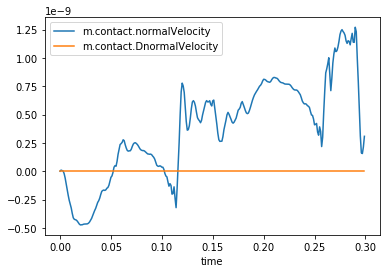

In [1378]:
res.head(num_head)[
    [ 'time'
#     , 'm.contact.contactPointVelocity[1]'
#     , 'm.contact.contactPointVelocity[2]'
    , 'm.contact.normalVelocity'
    , 'm.contact.DnormalVelocity'
#     , 'm.contact.contactPointVelocity[3]'
    ]
].plot(x = 'time')

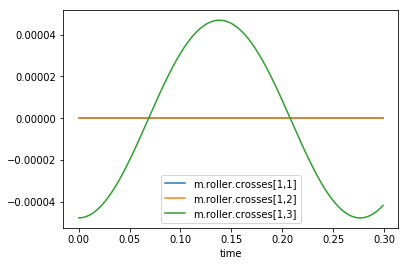

In [1379]:
res.head(num_head)[
    [ 'time'
    , 'm.roller.crosses[1,1]'
    , 'm.roller.crosses[1,2]'
    , 'm.roller.crosses[1,3]'
    ]
].plot(x = 'time')

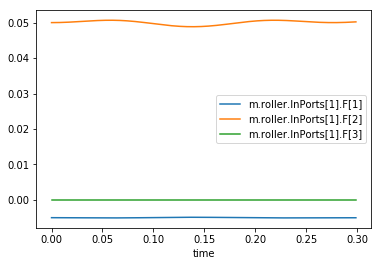

In [1380]:
res.head(num_head)[
    [ 'time'
    , 'm.roller.InPorts[1].F[1]'
    , 'm.roller.InPorts[1].F[2]'
    , 'm.roller.InPorts[1].F[3]'
    ]
].plot(x = 'time')

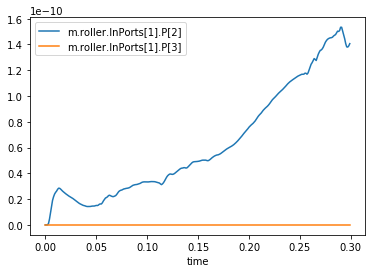

In [1381]:
res.head(num_head)[
    [ 'time'
#     , 'm.roller.InPorts[1].P[1]'
    , 'm.roller.InPorts[1].P[2]'
    , 'm.roller.InPorts[1].P[3]'
    ]
].plot(x = 'time')

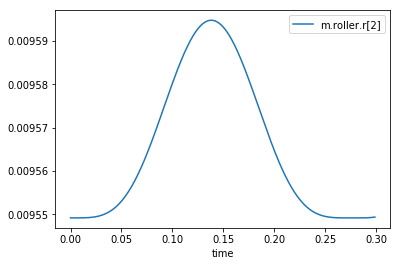

In [1382]:
res.head(num_head)[
    [ 'time'
#     , 'm.roller.r[1]'
    , 'm.roller.r[2]'
#     , 'm.roller.r[3]'
    ]
].plot(x = 'time')

behold please


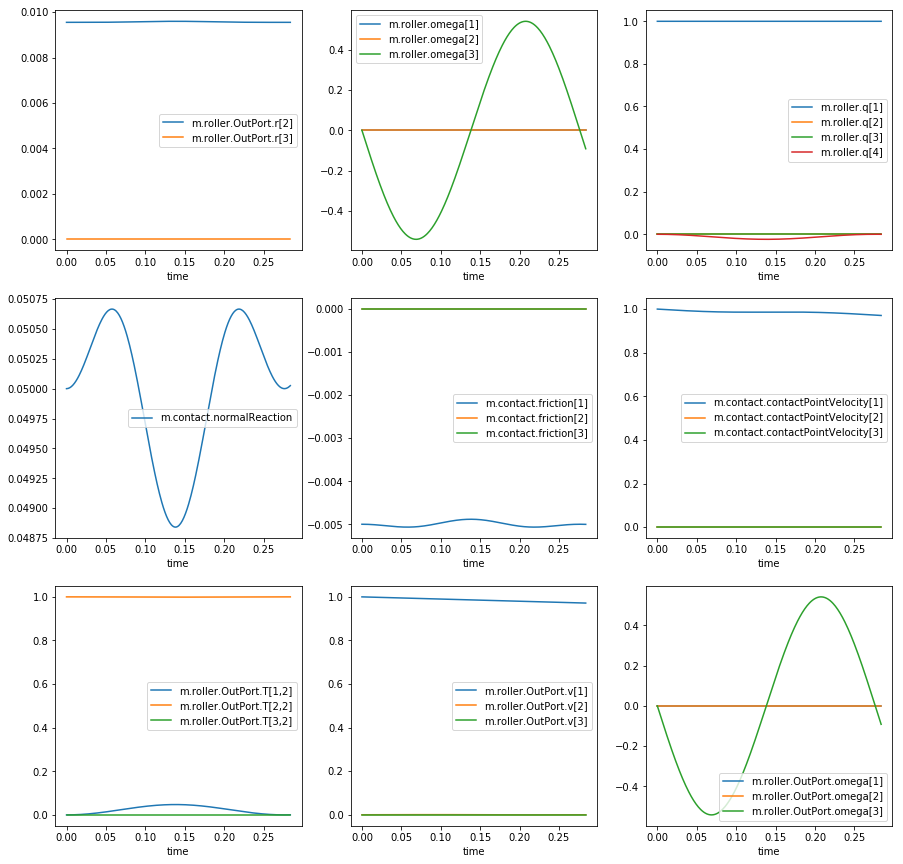

In [1383]:
fig, axs = plt.subplots(3, 3, figsize = (15, 15))

num_head = 285

res.head(num_head)[
    [ 'time'
#     , 'm.roller.OutPort.r[1]'
    , 'm.roller.OutPort.r[2]'
    , 'm.roller.OutPort.r[3]'
    ]
].plot(x = 'time', ax = axs[0][0])

res.head(num_head)[
    [ 'time'
    , 'm.roller.omega[1]'
    , 'm.roller.omega[2]'
    , 'm.roller.omega[3]'
    ]
].plot(x = 'time', ax = axs[0][1])

res.head(num_head)[
    [ 'time'
    , 'm.roller.q[1]'
    , 'm.roller.q[2]'
    , 'm.roller.q[3]'
    , 'm.roller.q[4]'
    ]
].plot(x = 'time', ax = axs[0][2])

res.head(num_head)[
    [ 'time'
    , 'm.contact.normalReaction'
    ]
].plot(x = 'time', ax = axs[1][0])

res.head(num_head)[
    [ 'time'
    , 'm.contact.friction[1]'
    , 'm.contact.friction[2]'
    , 'm.contact.friction[3]'
    ]
].plot(x = 'time', ax = axs[1][1])

res.head(num_head)[
    [ 'time'
    , 'm.contact.contactPointVelocity[1]'
    , 'm.contact.contactPointVelocity[2]'
    , 'm.contact.contactPointVelocity[3]'
    ]
].plot(x = 'time', ax = axs[1][2])

res.head(num_head)[
    [ 'time'
    , 'm.roller.OutPort.v[1]'
    , 'm.roller.OutPort.v[2]'
    , 'm.roller.OutPort.v[3]'
    ]
].plot(x = 'time', ax = axs[2][1])

res.head(num_head)[
    [ 'time'
    , 'm.roller.OutPort.omega[1]'
    , 'm.roller.OutPort.omega[2]'
    , 'm.roller.OutPort.omega[3]'
    ]
].plot(x = 'time', ax = axs[2][2])

res.head(num_head)[
    [ 'time'
    , 'm.roller.OutPort.T[1,2]'
    , 'm.roller.OutPort.T[2,2]'
    , 'm.roller.OutPort.T[3,2]'
    ]
].plot(x = 'time', ax = axs[2][0])

print("behold please")

behold please


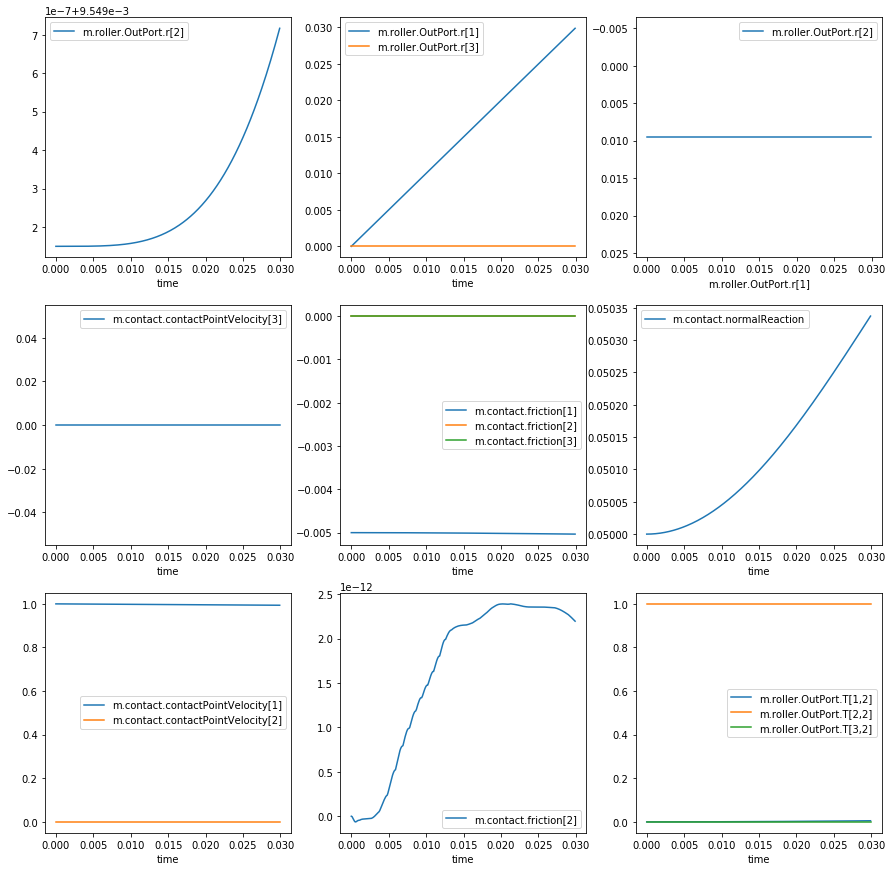

In [1374]:
fig, axs = plt.subplots(3, 3, figsize = (15, 15))

num_head = 300

res.head(num_head)[
    [ 'time'
    , 'm.roller.OutPort.r[2]'
    ]
].plot(x = 'time', ax = axs[0][0])

res.head(num_head)[
    [ 'time'
    , 'm.roller.OutPort.r[1]'
    , 'm.roller.OutPort.r[3]'
    ]
].plot(x = 'time', ax = axs[0][1])

axs[0][2].invert_yaxis()
axs[0][2].axis('equal')
res.head(num_head)[
    [ 'm.roller.OutPort.r[1]'
    , 'm.roller.OutPort.r[2]'
    ]
].plot(x = 'm.roller.OutPort.r[1]', ax = axs[0][2])

res.head(num_head)[
    [ 'time'
    , 'm.contact.contactPointVelocity[3]'
    ]
].plot(x = 'time', ax = axs[1][0])

res.head(num_head)[
    [ 'time'
    , 'm.contact.friction[1]'
    , 'm.contact.friction[2]'
    , 'm.contact.friction[3]'
    ]
].plot(x = 'time', ax = axs[1][1])

res.head(num_head)[
    [ 'time'
    , 'm.contact.normalReaction'
    ]
].plot(x = 'time', ax = axs[1][2])

res.head(num_head)[
    [ 'time'
    , 'm.contact.contactPointVelocity[1]'
    , 'm.contact.contactPointVelocity[2]'
    ]
].plot(x = 'time', ax = axs[2][0])

res.head(num_head)[
    [ 'time'
    , 'm.contact.friction[2]'
    ]
].plot(x = 'time', ax = axs[2][1])

res.head(num_head)[
    [ 'time'
    , 'm.roller.OutPort.T[1,2]'
    , 'm.roller.OutPort.T[2,2]'
    , 'm.roller.OutPort.T[3,2]'
    ]
].plot(x = 'time', ax = axs[2][2])

print("behold please")

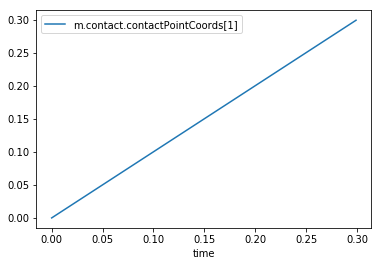

In [1260]:
res.head(num_head)[
    [ 'time'
#     , 'm.contact.contactPointVelocity[1]'
    , 'm.contact.contactPointCoords[1]'
#     , 'm.contact.contactPointVelocity[3]'
    ]
].plot(x = 'time')

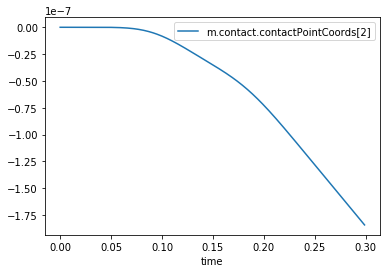

In [1251]:
res.head(num_head)[
    [ 'time'
#     , 'm.contact.contactPointCoords[1]'
    , 'm.contact.contactPointCoords[2]'
#     , 'm.contact.contactPointCoords[3]'
    ]
].plot(x = 'time')

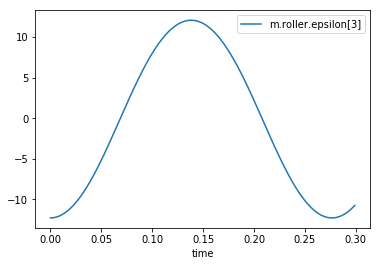

In [1238]:
# eps = 3.88e+6 * 0.05*(1-cos(pi/5)) * 1e-1 * 0.05
res.head(num_head)[
    [ 'time'
#     , 'm.contact.cosBetweenWheelVerticalAndGlobalVertical'
#     , 'm.roller.OutPort.r[2]'
    , 'm.roller.epsilon[3]'
#     , 'm.roller.OutPort.omega[1]'
    ]
].plot(x = 'time')

In [1216]:
res[
    [ 'time'
    , 'm.roller.epsilon[1]'
    , 'm.roller.epsilon[2]'
    , 'm.roller.epsilon[3]'
    ]
].head()

time  m.roller.epsilon[1]  m.roller.epsilon[2]  m.roller.epsilon[3]
0  0.000                    0                    0           -12.293481
1  0.001                    0                    0           -12.290393
2  0.002                    0                    0           -12.281129
3  0.003                    0                    0           -12.265693
4  0.004                    0                    0           -12.244091

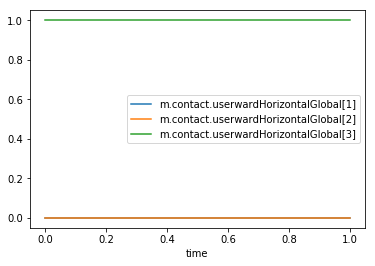

In [1203]:
res[
    [ 'time'
    , 'm.contact.userwardHorizontalGlobal[1]'
    , 'm.contact.userwardHorizontalGlobal[2]'
    , 'm.contact.userwardHorizontalGlobal[3]'
    ]
].plot(x = 'time')

In [1204]:
r_and_T = res[
    [ 'm.roller.OutPort.r[2]'
    , 'm.roller.OutPort.r[3]'
    , 'm.roller.OutPort.T[2,2]'
    , 'm.roller.OutPort.T[3,2]'
    ]
]
loc_vert = r_and_T.apply(
    lambda row: pd.Series(
        { 'loc_vert_2' : row[0] + row[2]
        , 'loc_vert_3' : row[1] + row[3]
        }
    ), axis = 1
)
r_and_T_and_loc_vert = pd.concat(
    [ r_and_T
    , loc_vert
    ],
    axis = 1
)
r_and_T_and_loc_vert.head()

m.roller.OutPort.r[2]  m.roller.OutPort.r[3]  m.roller.OutPort.T[2,2]  \
0               0.009549                      0                        1   
1               0.009549                      0                        1   
2               0.009549                      0                        1   
3               0.009549                      0                        1   
4               0.009549                      0                        1   

   m.roller.OutPort.T[3,2]  loc_vert_2  loc_vert_3  
0                        0    1.009549         0.0  
1                        0    1.009549         0.0  
2                        0    1.009549         0.0  
3                        0    1.009549         0.0  
4                        0    1.009549         0.0

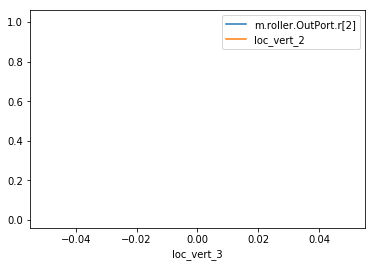

In [1205]:
fig, ax = plt.subplots()

r_and_T_and_loc_vert.head(100)[
    [ 'm.roller.OutPort.r[2]'
    , 'm.roller.OutPort.r[3]'
    ]
].plot(x = 'm.roller.OutPort.r[3]', ax = ax)

r_and_T_and_loc_vert.head(100)[
    [ 'loc_vert_2'
    , 'loc_vert_3'
    ]
].plot(x = 'loc_vert_3', ax = ax)

# ax1 = ax.twinx()
# ax1.invert_xaxis()
# res[
#     [ 'time'
#     , 'm.contact.contactPointVelocity[3]'
#     ]
# ].plot(x = 'time', ax = ax1)

### Omni-wheel on plane free

In [113]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.Omni.OmniWheelOnPlaneFreeTest_res.csv')

In [236]:
res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.Omni.OmniWheelOnPlaneFreeTest_res.csv')

In [237]:
len(res)

1021

In [238]:
n = 5
nActual = 5

Behold!


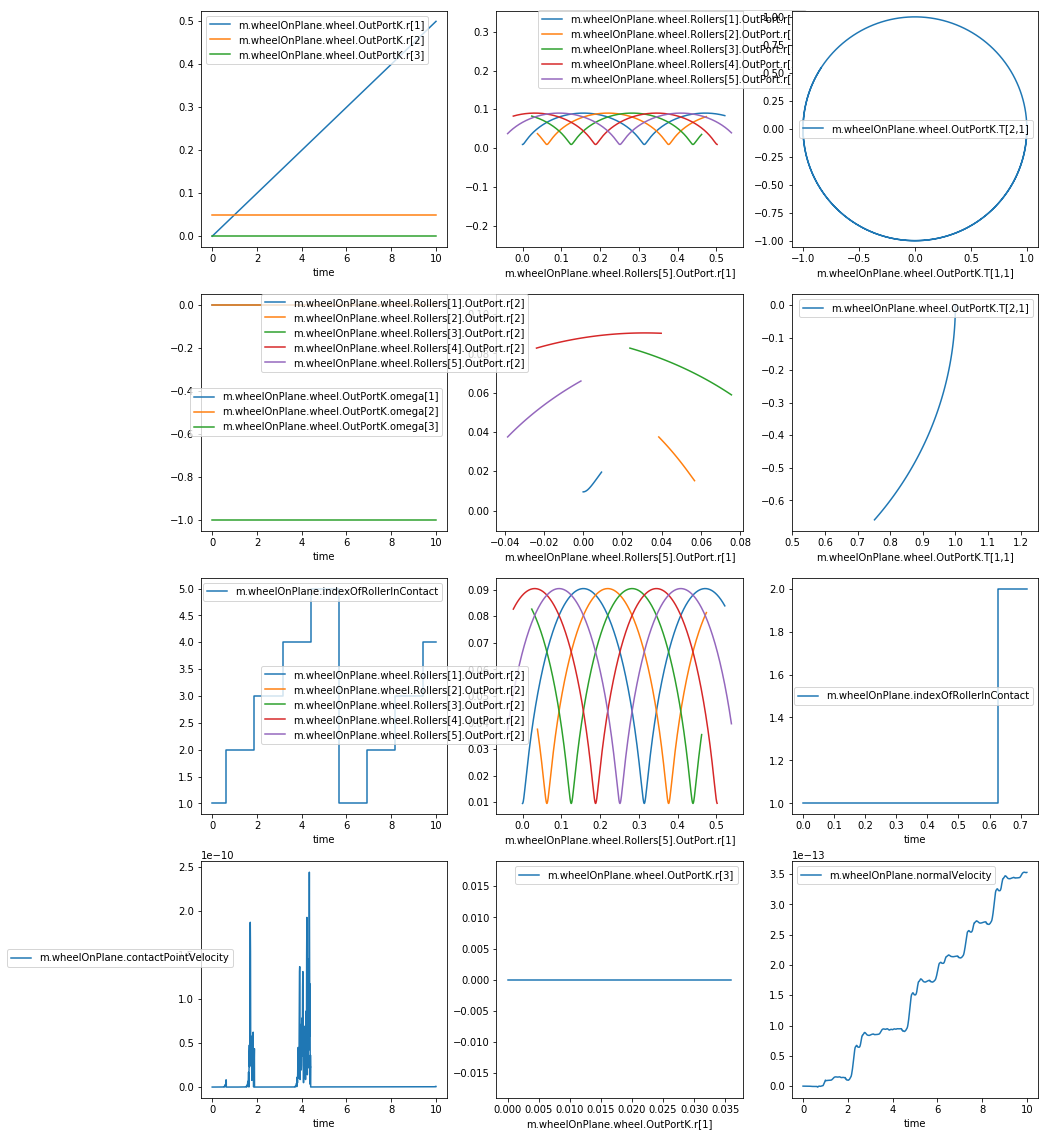

In [241]:
fig, axs = plt.subplots(4, 3, figsize = (15, 20))

res[
    [ 'time'
    , 'm.wheelOnPlane.wheel.OutPortK.r[1]'
    , 'm.wheelOnPlane.wheel.OutPortK.r[2]'
    , 'm.wheelOnPlane.wheel.OutPortK.r[3]'
    ]
].plot(x = 'time', ax = axs[0][0])

axs[0][1].axis('equal')
for i in range(n):
    res[
        [ 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
        ]
    ].plot(x = 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]', ax = axs[0][1])
axs[0][1].legend(bbox_to_anchor=(0.15, 0.65))

axs[0][2].axis('equal')
res[
    [ 'm.wheelOnPlane.wheel.OutPortK.T[1,1]'
    , 'm.wheelOnPlane.wheel.OutPortK.T[2,1]'
    ]
].plot(x = 'm.wheelOnPlane.wheel.OutPortK.T[1,1]', ax = axs[0][2])

res[
    [ 'time'
    , 'm.wheelOnPlane.wheel.OutPortK.omega[1]'
    , 'm.wheelOnPlane.wheel.OutPortK.omega[2]'
    , 'm.wheelOnPlane.wheel.OutPortK.omega[3]'
    ]
].plot(x = 'time', ax = axs[1][0])

num_head = 75

axs[1][1].axis('equal')
for i in range(n):
    res.head(num_head)[
        [ 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
        ]
    ].plot(x = 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]', ax = axs[1][1])
axs[1][1].legend(bbox_to_anchor=(0.15, 0.65))

axs[1][2].axis('equal')
res.head(num_head)[
    [ 'm.wheelOnPlane.wheel.OutPortK.T[1,1]'
    , 'm.wheelOnPlane.wheel.OutPortK.T[2,1]'
    ]
].plot(x = 'm.wheelOnPlane.wheel.OutPortK.T[1,1]', ax = axs[1][2])

res[
    [ 'time'
    , 'm.wheelOnPlane.indexOfRollerInContact'
    ]
].plot(x = 'time', ax = axs[2][0])

res.head(num_head)[
    [ 'time'
    , 'm.wheelOnPlane.indexOfRollerInContact'
    ]
].plot(x = 'time', ax = axs[2][2])

for i in range(n):
    res[
        [ 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
        ]
    ].plot(x = 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]', ax = axs[2][1])
axs[2][1].legend(bbox_to_anchor=(0.15, 0.65))

res[
    [ 'time'
    , 'm.wheelOnPlane.contactPointVelocity'
    ]
].plot(x = 'time', ax = axs[3][0])
axs[3][0].legend(bbox_to_anchor=(0.15, 0.65))

axs[3][1].axis('equal')
res.head(num_head)[
    [ 'm.wheelOnPlane.wheel.OutPortK.r[1]'
    , 'm.wheelOnPlane.wheel.OutPortK.r[3]'
    ]
].plot(x = 'm.wheelOnPlane.wheel.OutPortK.r[1]', ax = axs[3][1])

res[
    [ 'time'
    , 'm.wheelOnPlane.normalVelocity'
    ]
].plot(x = 'time', ax = axs[3][2])
axs[3][0].legend(bbox_to_anchor=(0.15, 0.65))

print('Behold!')

In [189]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(res.iloc[0])

time                                     0.000000e+00
m.wheel.Joints[1].angle                  0.000000e+00
m.wheel.Joints[2].angle                  0.000000e+00
m.wheel.Joints[3].angle                  0.000000e+00
m.wheel.Joints[4].angle                  0.000000e+00
m.wheel.Joints[5].angle                  0.000000e+00
m.wheel.Joints[1].mu                     0.000000e+00
m.wheel.Joints[2].mu                     0.000000e+00
m.wheel.Joints[3].mu                     0.000000e+00
m.wheel.Joints[4].mu                     0.000000e+00
m.wheel.Joints[5].mu                     0.000000e+00
m.wheel.Rollers[1].Active                1.000000e+00
m.wheel.Rollers[2].Active                1.000000e+00
m.wheel.Rollers[3].Active                1.000000e+00
m.wheel.Rollers[4].Active                1.000000e+00
m.wheel.Rollers[5].Active                1.000000e+00
m.wheel.Rollers[1].omega[1]              0.000000e+00
m.wheel.Rollers[1].omega[2]              0.000000e+00
m.wheel.Rollers[1].omega[3] 

In [273]:
R = 0.05
n = 5
k = 2 # starting from 1

vertical = np.array([ 0, 1 ])

alpha = np.pi / n
omega = 1 / R
R1 = R * np.cos(alpha)

wheel_center = R * vertical
roller_angle = 2 * alpha * (k - 1)
roller_center_rel = R1 * np.array([ np.sin(roller_angle), -np.cos(roller_angle) ])
roller_center = wheel_center + roller_center_rel
dist_to_roller_center = np.sqrt(sum(roller_center * roller_center))

roller_v = np.cross([ 0, 0, -omega ], [ roller_center[0], roller_center[1], 0 ])[:-1]
roller_v[1]

-0.7694208842938134

### Vertical Wheel

In [113]:
vw_res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.Omni.OmniWheelVerticalTest_res.csv')

In [1384]:
vw_res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.Omni.OmniWheelVerticalTest_res.csv')

In [633]:
vw_res = pd.read_csv('/home/vf/om/models/omni/test/res/MbsLite.Test.Omni.OmniWheelVerticalTest_res_1e-1_1e-6.csv')

In [1385]:
len(vw_res)

1005

In [1386]:
n = 5
nActual = 5

Behold!


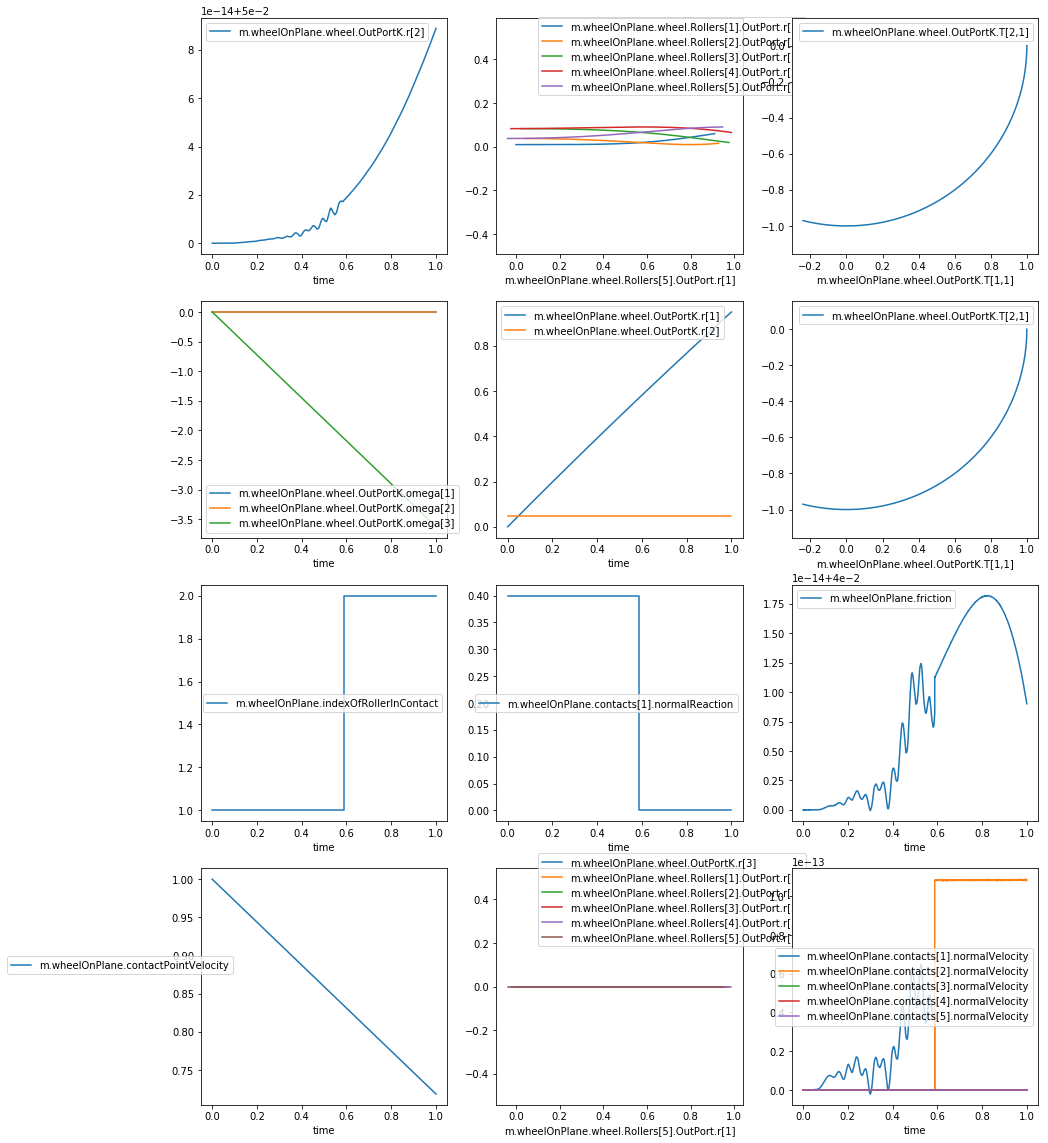

In [1387]:
fig, axs = plt.subplots(4, 3, figsize = (15, 20))

vw_res[
    [ 'time'
#     , 'm.wheelOnPlane.wheel.OutPortK.r[1]'
    , 'm.wheelOnPlane.wheel.OutPortK.r[2]'
#     , 'm.wheelOnPlane.wheel.OutPortK.r[3]'
    ]
].plot(x = 'time', ax = axs[0][0])

vw_res[
    [ 'time'
    , 'm.wheelOnPlane.wheel.OutPortK.r[1]'
    , 'm.wheelOnPlane.wheel.OutPortK.r[2]'
    ]
].plot(x = 'time', ax = axs[1][1])

axs[0][1].axis('equal')
for i in range(n):
    vw_res[
        [ 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
        ]
    ].plot(x = 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]', ax = axs[0][1])
axs[0][1].legend(bbox_to_anchor=(0.15, 0.65))

axs[0][2].axis('equal')
vw_res[
    [ 'm.wheelOnPlane.wheel.OutPortK.T[1,1]'
    , 'm.wheelOnPlane.wheel.OutPortK.T[2,1]'
    ]
].plot(x = 'm.wheelOnPlane.wheel.OutPortK.T[1,1]', ax = axs[0][2])

vw_res[
    [ 'time'
    , 'm.wheelOnPlane.wheel.OutPortK.omega[1]'
    , 'm.wheelOnPlane.wheel.OutPortK.omega[2]'
    , 'm.wheelOnPlane.wheel.OutPortK.omega[3]'
    ]
].plot(x = 'time', ax = axs[1][0])

num_head = len(vw_res) # 75

axs[1][2].axis('equal')
vw_res.head(num_head)[
    [ 'm.wheelOnPlane.wheel.OutPortK.T[1,1]'
    , 'm.wheelOnPlane.wheel.OutPortK.T[2,1]'
    ]
].plot(x = 'm.wheelOnPlane.wheel.OutPortK.T[1,1]', ax = axs[1][2])

vw_res[
    [ 'time'
    , 'm.wheelOnPlane.indexOfRollerInContact'
    ]
].plot(x = 'time', ax = axs[2][0])

vw_res.head(num_head)[
    [ 'time'
    , 'm.wheelOnPlane.contacts[1].normalReaction'
    ]
].plot(x = 'time', ax = axs[2][1])

vw_res.head(num_head)[
    [ 'time'
    , 'm.wheelOnPlane.friction'
    ]
].plot(x = 'time', ax = axs[2][2])

vw_res.head(num_head)[
    [ 'time'
    , 'm.wheelOnPlane.contactPointVelocity'
    ]
].plot(x = 'time', ax = axs[3][0])
axs[3][0].legend(bbox_to_anchor=(0.15, 0.65))

axs[3][1].axis('equal')
vw_res.head(num_head)[
    [ 'm.wheelOnPlane.wheel.OutPortK.r[1]'
    , 'm.wheelOnPlane.wheel.OutPortK.r[3]'
    ]
].plot(x = 'm.wheelOnPlane.wheel.OutPortK.r[1]', ax = axs[3][1])
for i in range(n):
    vw_res[
        [ 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[3]'
        ]
    ].plot(x = 'm.wheelOnPlane.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]', ax = axs[3][1])
axs[3][1].legend(bbox_to_anchor=(0.15, 0.65))

vw_res[
    [ 'time'
    , 'm.wheelOnPlane.contacts[1].normalVelocity'
    , 'm.wheelOnPlane.contacts[2].normalVelocity'
    , 'm.wheelOnPlane.contacts[3].normalVelocity'
    , 'm.wheelOnPlane.contacts[4].normalVelocity'
    , 'm.wheelOnPlane.contacts[5].normalVelocity'
    ]
].plot(x = 'time', ax = axs[3][2])
axs[3][0].legend(bbox_to_anchor=(0.15, 0.65))

print('Behold!')

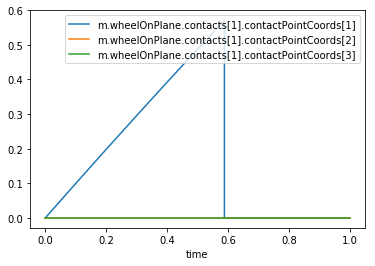

In [1388]:
vw_res[[
    'time'
    , 'm.wheelOnPlane.contacts[1].contactPointCoords[1]'
    , 'm.wheelOnPlane.contacts[1].contactPointCoords[2]'
    , 'm.wheelOnPlane.contacts[1].contactPointCoords[3]'
]].plot(x = 'time')

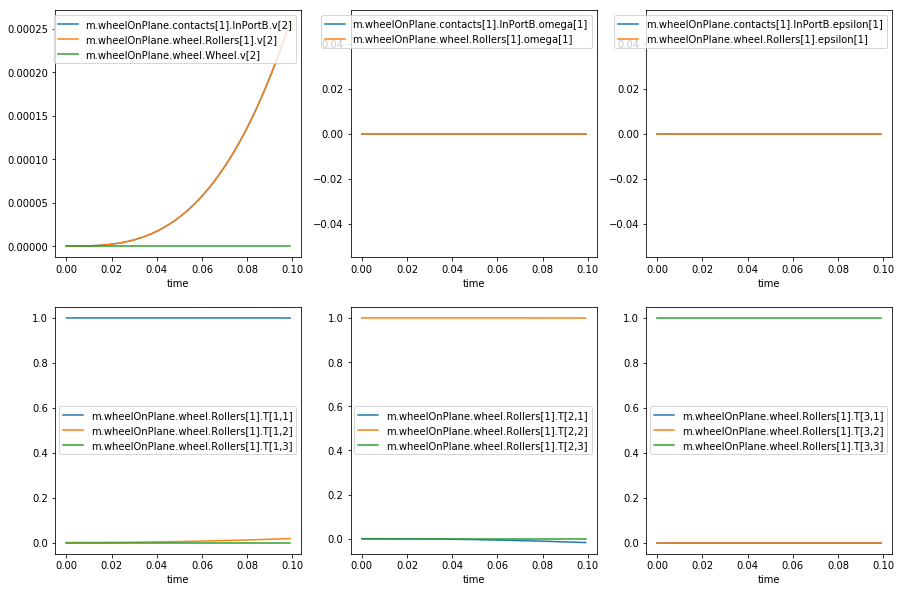

In [1389]:
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

num_head = 100

vw_res.head(num_head)[[
    'time'
#     , 'm.wheelOnPlane.contacts[1].contactPointVelocity[1]'
#     , 'm.wheelOnPlane.contacts[1].contactPointVelocity[2]'
#     , 'm.wheelOnPlane.contacts[1].contactPointVelocity[3]'
#     , 'm.wheelOnPlane.contacts[1].contactPointCoords[3]'
#     , 'm.wheelOnPlane.contacts[1].InPortB.v[1]'
    , 'm.wheelOnPlane.contacts[1].InPortB.v[2]'
#     , 'm.wheelOnPlane.contacts[1].InPortB.omega[1]'
#     , 'm.wheelOnPlane.contacts[1].InPortB.omega[2]'
#     , 'm.wheelOnPlane.contacts[1].InPortB.omega[3]'
#     , 'm.wheelOnPlane.contacts[1].InPortB.v[3]'
#     , 'm.wheelOnPlane.contacts[1].contactPointCoords[3]'
]].plot(x = 'time', ax = axs[0][0])

vw_res.head(num_head)[[
    'time'
#     , 'm.wheelOnPlane.contacts[1].contactPointVelocity[1]'
#     , 'm.wheelOnPlane.contacts[1].contactPointVelocity[2]'
#     , 'm.wheelOnPlane.contacts[1].contactPointVelocity[3]'
#     , 'm.wheelOnPlane.contacts[1].contactPointCoords[3]'
#     , 'm.wheelOnPlane.contacts[1].InPortB.v[1]'
#     , 'm.wheelOnPlane.contacts[1].InPortB.v[2]'
    , 'm.wheelOnPlane.contacts[1].InPortB.omega[1]'
#     , 'm.wheelOnPlane.contacts[1].InPortB.omega[2]'
#     , 'm.wheelOnPlane.contacts[1].InPortB.omega[3]'
#     , 'm.wheelOnPlane.contacts[1].InPortB.v[3]'
#     , 'm.wheelOnPlane.contacts[1].contactPointCoords[3]'
]].plot(x = 'time', ax = axs[0][1])

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.contacts[1].InPortB.epsilon[1]'
#     , 'm.wheelOnPlane.contacts[1].InPortB.epsilon[2]'
#     , 'm.wheelOnPlane.contacts[1].InPortB.epsilon[3]'
]].plot(x = 'time', ax = axs[0][2])

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.wheel.Rollers[1].v[2]'
    , 'm.wheelOnPlane.wheel.Wheel.v[2]'
]].plot(x = 'time', ax = axs[0][0])

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.wheel.Rollers[1].omega[1]'
]].plot(x = 'time', ax = axs[0][1])

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.wheel.Rollers[1].epsilon[1]'
]].plot(x = 'time', ax = axs[0][2])

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.wheel.Rollers[1].T[1,1]'
    , 'm.wheelOnPlane.wheel.Rollers[1].T[1,2]'
    , 'm.wheelOnPlane.wheel.Rollers[1].T[1,3]'
]].plot(x = 'time', ax = axs[1][0])

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.wheel.Rollers[1].T[2,1]'
    , 'm.wheelOnPlane.wheel.Rollers[1].T[2,2]'
    , 'm.wheelOnPlane.wheel.Rollers[1].T[2,3]'
]].plot(x = 'time', ax = axs[1][1])

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.wheel.Rollers[1].T[3,1]'
    , 'm.wheelOnPlane.wheel.Rollers[1].T[3,2]'
    , 'm.wheelOnPlane.wheel.Rollers[1].T[3,3]'
]].plot(x = 'time', ax = axs[1][2])

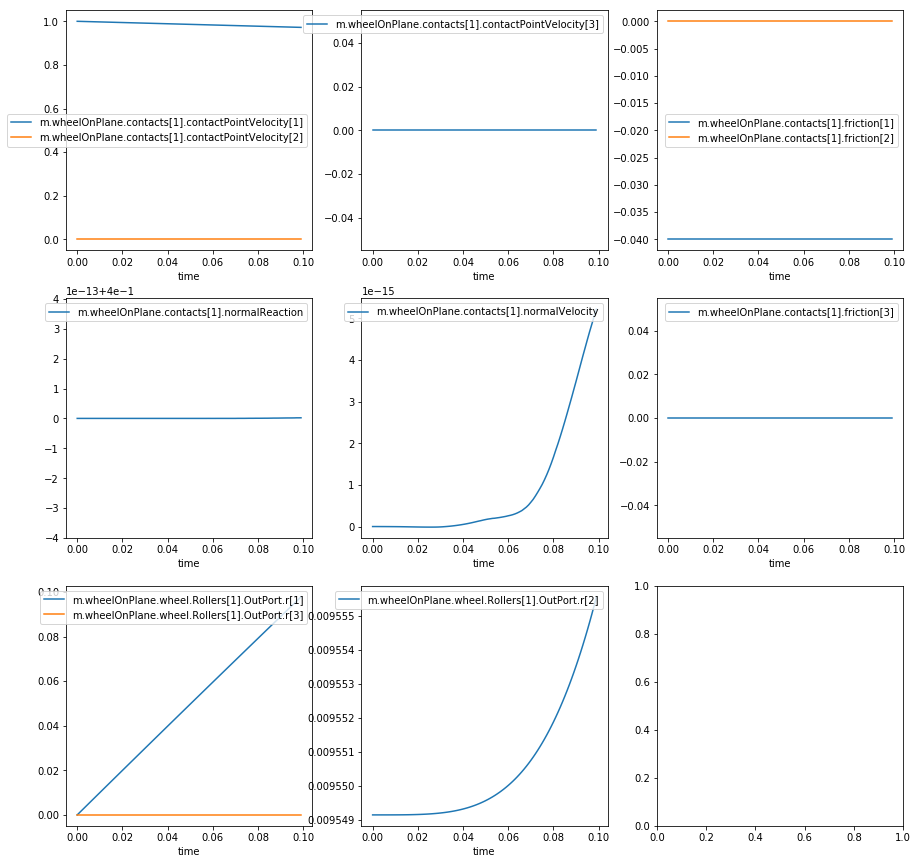

In [1390]:
fig, axs = plt.subplots(3, 3, figsize = (15, 15))

num_head = 100

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.contacts[1].contactPointVelocity[1]'
    , 'm.wheelOnPlane.contacts[1].contactPointVelocity[2]'
#     , 'm.wheelOnPlane.contacts[1].contactPointVelocity[3]'
]].plot(x = 'time', ax = axs[0][0])

vw_res.head(num_head)[[
    'time'
#     , 'm.wheelOnPlane.contacts[1].contactPointVelocity[1]'
#     , 'm.wheelOnPlane.contacts[1].contactPointVelocity[2]'
    , 'm.wheelOnPlane.contacts[1].contactPointVelocity[3]'
]].plot(x = 'time', ax = axs[0][1])


vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.contacts[1].normalReaction'
]].plot(x = 'time', ax = axs[1][0])

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.contacts[1].normalVelocity'
]].plot(x = 'time', ax = axs[1][1])

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.contacts[1].friction[1]'
    , 'm.wheelOnPlane.contacts[1].friction[2]'
]].plot(x = 'time', ax = axs[0][2])

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.contacts[1].friction[3]'
]].plot(x = 'time', ax = axs[1][2])

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.wheel.Rollers[1].OutPort.r[1]'
    , 'm.wheelOnPlane.wheel.Rollers[1].OutPort.r[3]'
]].plot(x = 'time', ax = axs[2][0])

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.wheel.Rollers[1].OutPort.r[2]'
]].plot(x = 'time', ax = axs[2][1])

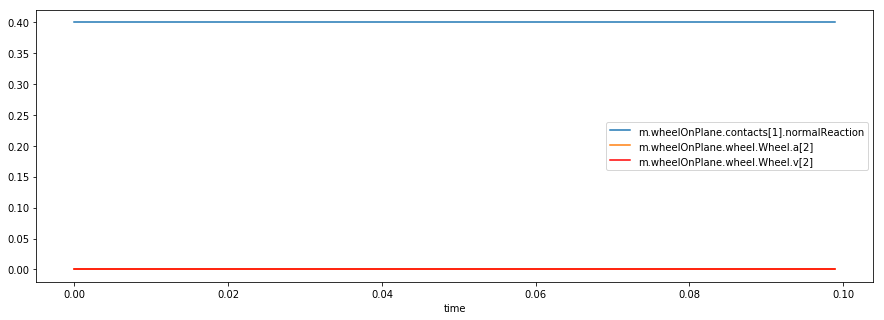

In [1391]:
fig, ax1 = plt.subplots(figsize = (15, 5))

vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.contacts[1].normalReaction'
    , 'm.wheelOnPlane.wheel.Wheel.a[2]'
]].plot(x = 'time', ax = ax1)

ax2 = ax1 # .twinx()
vw_res.head(num_head)[[
    'time'
    , 'm.wheelOnPlane.wheel.Wheel.v[2]'
]].plot(x = 'time', ax = ax2, color = 'red')

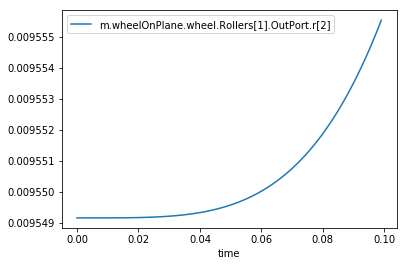

In [1392]:
vw_res.head(100)[[
    'time',
    'm.wheelOnPlane.wheel.Rollers[1].OutPort.r[2]'
]].plot(x = 'time')

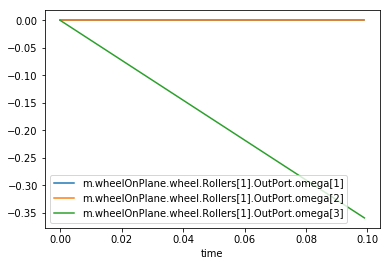

In [1393]:
vw_res.head(100)[[
    'time'
#     , 'm.wheelOnPlane.wheel.Wheel.OutPort.v[2]'
    
#      , 'm.wheelOnPlane.wheel.Wheel.InPorts[1].F[2]' # zero
#      , 'm.wheelOnPlane.wheel.Wheel.InPorts[2].F[2]' # positive
#      , 'm.wheelOnPlane.wheel.Wheel.InPorts[3].F[2]' # negative
#      , 'm.wheelOnPlane.wheel.Wheel.InPorts[4].F[2]' # negative
#      , 'm.wheelOnPlane.wheel.Wheel.InPorts[5].F[2]' # negative
#      , 'm.wheelOnPlane.wheel.Wheel.InPorts[6].F[2]' # negative

#     , 'm.wheelOnPlane.contacts[1].OutPortB.F[1]'
#     , 'm.wheelOnPlane.contacts[1].OutPortB.F[2]'
#     , 'm.wheelOnPlane.contacts[1].OutPortB.F[3]'
    
    , 'm.wheelOnPlane.wheel.Rollers[1].OutPort.omega[1]'
    , 'm.wheelOnPlane.wheel.Rollers[1].OutPort.omega[2]'
    , 'm.wheelOnPlane.wheel.Rollers[1].OutPort.omega[3]'
]].plot(x = 'time')

### Omni Vehicle

In [2]:
import datetime

In [ ]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.Omni.OmniVehicleTest_res.csv')

In [212]:
skiprows = [ i for i in range(1000000) if i % 100 == 0 ]

In [3]:
%%time
print(datetime.datetime.now())
res = pd.read_csv(
    '/home/vf/om/models/omni/test/out/MbsLite.Test.Omni.OmniVehicleTest_res.csv'
    # , skiprows = 1000
    # , nrows=3000
)
print(len(res))

2018-10-20 21:35:33.447340
6334
CPU times: user 34.4 s, sys: 2.86 s, total: 37.3 s
Wall time: 43.5 s


In [ ]:
res = res.iloc[550:750]
len(res)

In [ ]:
res = res.head(10)
len(res)

In [ ]:
self_rot = res

In [ ]:
self_rot = pd.read_csv('/home/vf/om/models/omni/test/res/MbsLite.Test.Omni.OmniVehicleTest_res_selfRot_1e-1_1e-6.csv')
len(self_rot)

In [120]:
len(res)

1893

In [ ]:
at_rest = pd.read_csv('/home/vf/om/models/omni/test/res/MbsLite.Test.Omni.OmniVehicleTest_res_atRest_1e-1_1e-6.csv')
len(at_rest)

In [4]:
n = 5
nActual = n
N = 3
NActual = N

In [5]:
platform_center = ['m.platform.OutPort.r[1]', 'm.platform.OutPort.r[2]', 'm.platform.OutPort.r[3]']

wheel_centers = [
    ['m.wheels[{0}].wheel.OutPortK.r[1]'.format(i), 'm.wheels[{0}].wheel.OutPortK.r[2]'.format(i), 'm.wheels[{0}].wheel.OutPortK.r[3]'.format(i)]
    for i in range(1, NActual + 1)
]

roller_centers = [
    ['m.wheels[{0}].wheel.Rollers[{1}].OutPort.r[1]'.format(i, j), 'm.wheels[{0}].wheel.Rollers[{1}].OutPort.r[2]'.format(i, j), 'm.wheels[{0}].wheel.Rollers[{1}].OutPort.r[3]'.format(i, j)]
    for i in range(1, NActual + 1)
    for j in range(1, nActual + 1)
]

centers = [ platform_center ] + wheel_centers + roller_centers

Behold!


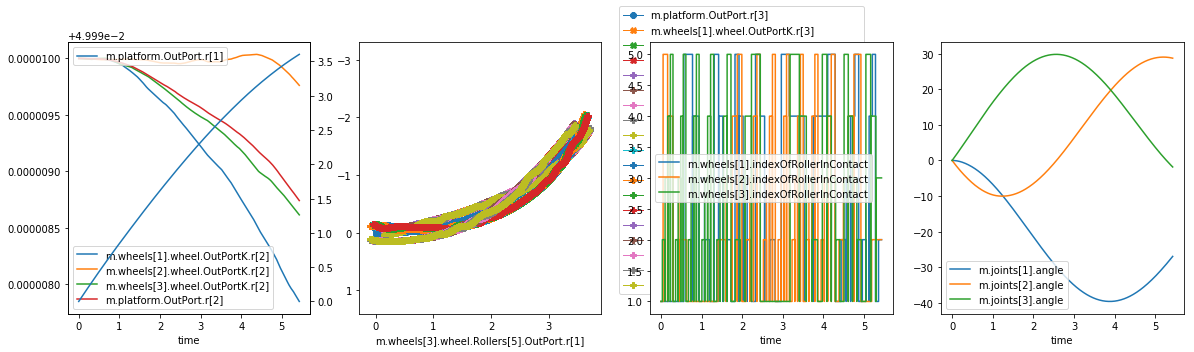

In [6]:
fig, axs = plt.subplots(1, 4, figsize = (20, 5))

wheels_r2 = res[
    [ 'time'
    , 'm.wheels[1].wheel.OutPortK.r[2]'
    , 'm.wheels[2].wheel.OutPortK.r[2]'
    , 'm.wheels[3].wheel.OutPortK.r[2]'
    , 'm.platform.OutPort.r[2]'
    ]
]

platform_r2 = res[
    [ 'time'
    , 'm.platform.OutPort.r[1]'
    ]
]

platform_center_df = [
    res[
        [ center[0], center[2] ]
    ]
    for center in [ platform_center ]
]
wheel_centers_dfs = [
    res[
        [ center[0], center[2] ]
    ]
    for center in wheel_centers
]
roller_centers_dfs = [
    res[
        [ center[0], center[2] ]
    ]
    for center in roller_centers
]

index_of_roller_in_contact = res[
    [ 'time'
    , 'm.wheels[1].indexOfRollerInContact'
    , 'm.wheels[2].indexOfRollerInContact'
    , 'm.wheels[3].indexOfRollerInContact'
    ]
]

wheels_r2.plot(x = 'time', ax = axs[0])
ax1 = axs[0].twinx()
platform_r2.plot(x = 'time', ax = ax1)

trajectory_axs = axs[1]
trajectory_axs.axis('equal')
trajectory_axs.invert_yaxis() # userward goes downward when looking from top
for i, center in enumerate([ platform_center ]):
    platform_center_df[i].plot(x = center[0], ax = trajectory_axs, linewidth = 1, marker = '8')
for i, center in enumerate(wheel_centers):
    wheel_centers_dfs[i].plot(x = center[0], ax = trajectory_axs, linewidth = 1, marker = 'X')
for i, center in enumerate(roller_centers):
    roller_centers_dfs[i].plot(x = center[0], ax = trajectory_axs, linewidth = 1, marker = 'P')
trajectory_axs.legend(bbox_to_anchor=(1.05, 1.15))

index_of_roller_in_contact.plot(x = 'time', ax = axs[2])

res[
    [ 'time'
    , 'm.joints[1].angle'
    , 'm.joints[2].angle'
    , 'm.joints[3].angle'
    ]
].plot(x = 'time', ax = axs[3])

print('Behold!')

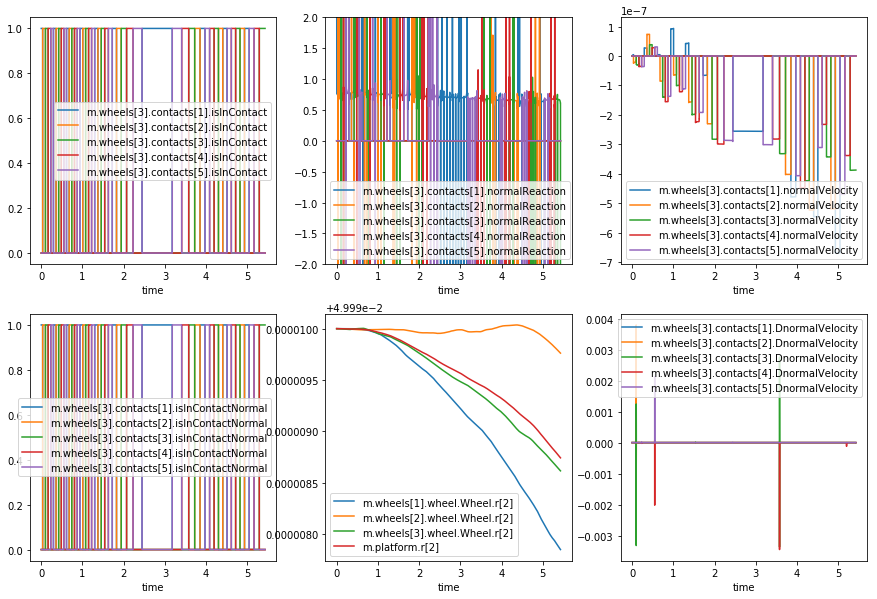

In [7]:
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

this_res = res.iloc[
#     33:44
#     198:209
    :
]

this_res[
    [ 'time'
    , 'm.wheels[3].contacts[1].isInContact'
    , 'm.wheels[3].contacts[2].isInContact'
    , 'm.wheels[3].contacts[3].isInContact'
    , 'm.wheels[3].contacts[4].isInContact'
    , 'm.wheels[3].contacts[5].isInContact'
    ]
].plot(x = 'time', ax = axs[0,0])

axs[0,1].set_ylim(-2, 2)
this_res[
    [ 'time'
    , 'm.wheels[3].contacts[1].normalReaction'
    , 'm.wheels[3].contacts[2].normalReaction'
    , 'm.wheels[3].contacts[3].normalReaction'
    , 'm.wheels[3].contacts[4].normalReaction'
    , 'm.wheels[3].contacts[5].normalReaction'
    ]
].plot(x = 'time', ax = axs[0,1])

this_res[
    [ 'time'
    , 'm.wheels[3].contacts[1].normalVelocity'
    , 'm.wheels[3].contacts[2].normalVelocity'
    , 'm.wheels[3].contacts[3].normalVelocity'
    , 'm.wheels[3].contacts[4].normalVelocity'
    , 'm.wheels[3].contacts[5].normalVelocity'
    ]
].plot(x = 'time', ax = axs[0,2])

this_res[
    [ 'time'
    , 'm.wheels[3].contacts[1].isInContactNormal'
    , 'm.wheels[3].contacts[2].isInContactNormal'
    , 'm.wheels[3].contacts[3].isInContactNormal'
    , 'm.wheels[3].contacts[4].isInContactNormal'
    , 'm.wheels[3].contacts[5].isInContactNormal'
    ]
].plot(x = 'time', ax = axs[1,0])

this_res[
    [ 'time'
    , 'm.wheels[1].wheel.Wheel.r[2]'
    , 'm.wheels[2].wheel.Wheel.r[2]'
    , 'm.wheels[3].wheel.Wheel.r[2]'
    , 'm.platform.r[2]'
    ]
].plot(x = 'time', ax = axs[1,1])

this_res[
    [ 'time'
    , 'm.wheels[3].contacts[1].DnormalVelocity'
    , 'm.wheels[3].contacts[2].DnormalVelocity'
    , 'm.wheels[3].contacts[3].DnormalVelocity'
    , 'm.wheels[3].contacts[4].DnormalVelocity'
    , 'm.wheels[3].contacts[5].DnormalVelocity'
    ]
].plot(x = 'time', ax = axs[1,2])

beholde!


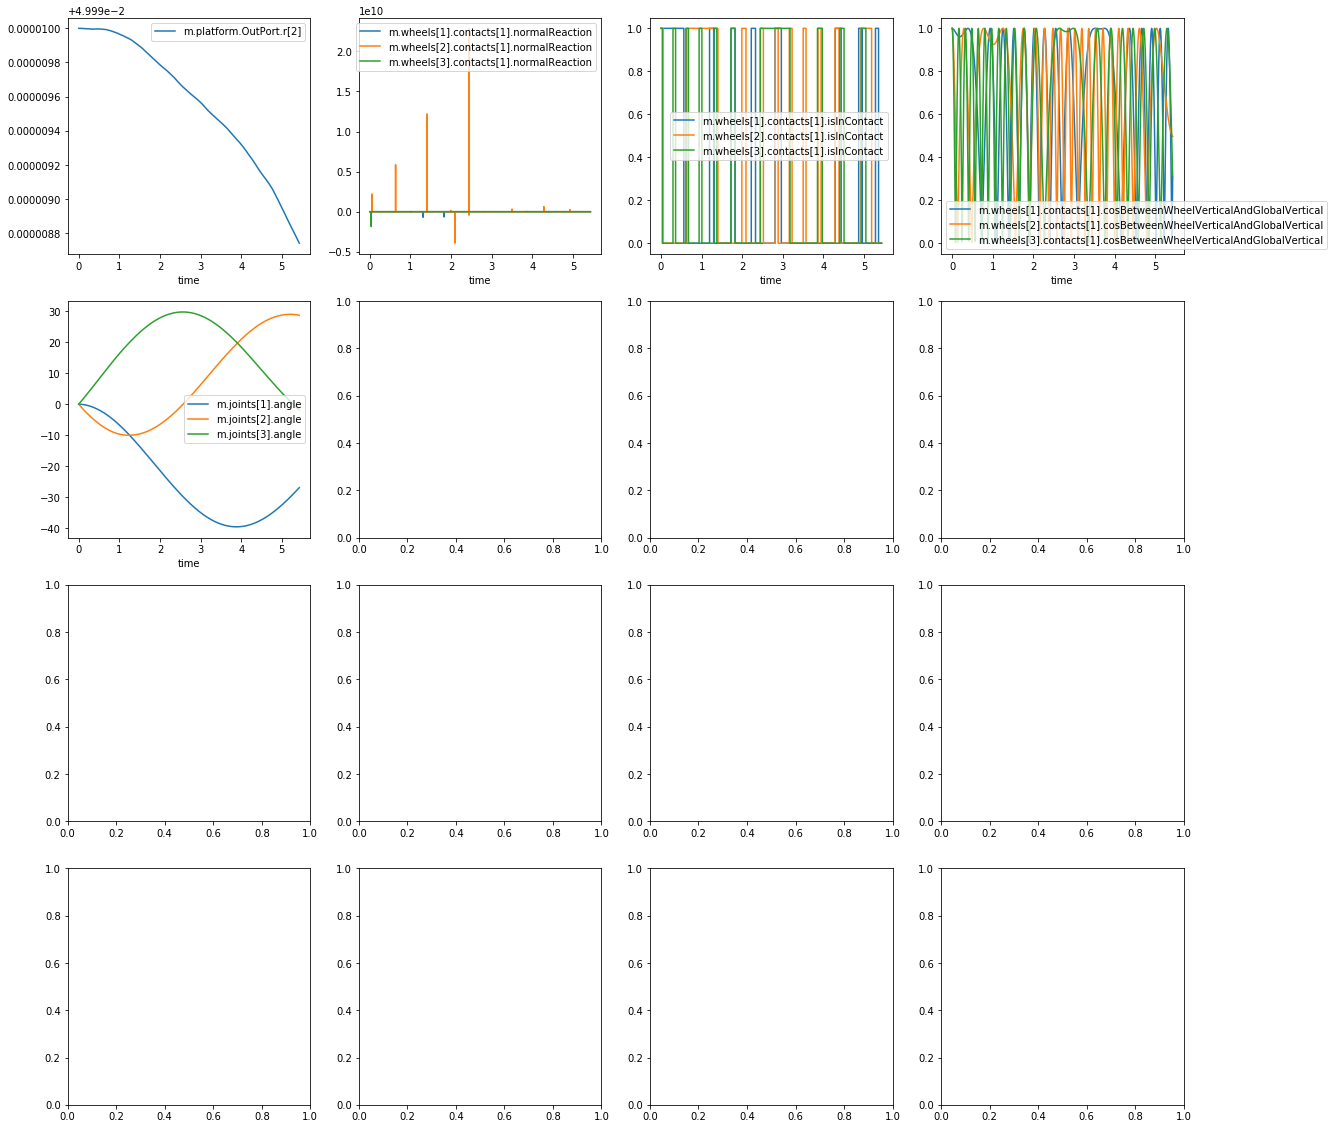

In [8]:
fig, axs = plt.subplots(4, 4, figsize = (20, 20))

t_min = 0 # 400
t_max = 10000

res.iloc[t_min:t_max][
    [ 'time'
    , 'm.platform.OutPort.r[2]'
    ]
].plot(x = 'time', ax = axs[0][0])

res.iloc[t_min:t_max][
    [ 'time'
    , 'm.wheels[1].contacts[1].normalReaction'
    , 'm.wheels[2].contacts[1].normalReaction'
    , 'm.wheels[3].contacts[1].normalReaction'
    ]
].plot(x = 'time', ax = axs[0][1])

res.iloc[t_min:t_max][
    [ 'time'
    , 'm.wheels[1].contacts[1].isInContact'
    , 'm.wheels[2].contacts[1].isInContact'
    , 'm.wheels[3].contacts[1].isInContact'
    ]
].plot(x = 'time', ax = axs[0][2])

res.iloc[t_min:t_max][
    [ 'time'
    , 'm.wheels[1].contacts[1].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[2].contacts[1].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[3].contacts[1].cosBetweenWheelVerticalAndGlobalVertical'
    ]
].plot(x = 'time', ax = axs[0][3])

res.iloc[t_min:t_max][
    [ 'time'
    , 'm.joints[1].angle'
    , 'm.joints[2].angle'
    , 'm.joints[3].angle'
    ]
].plot(x = 'time', ax = axs[1][0])

print('beholde!')

Behold!


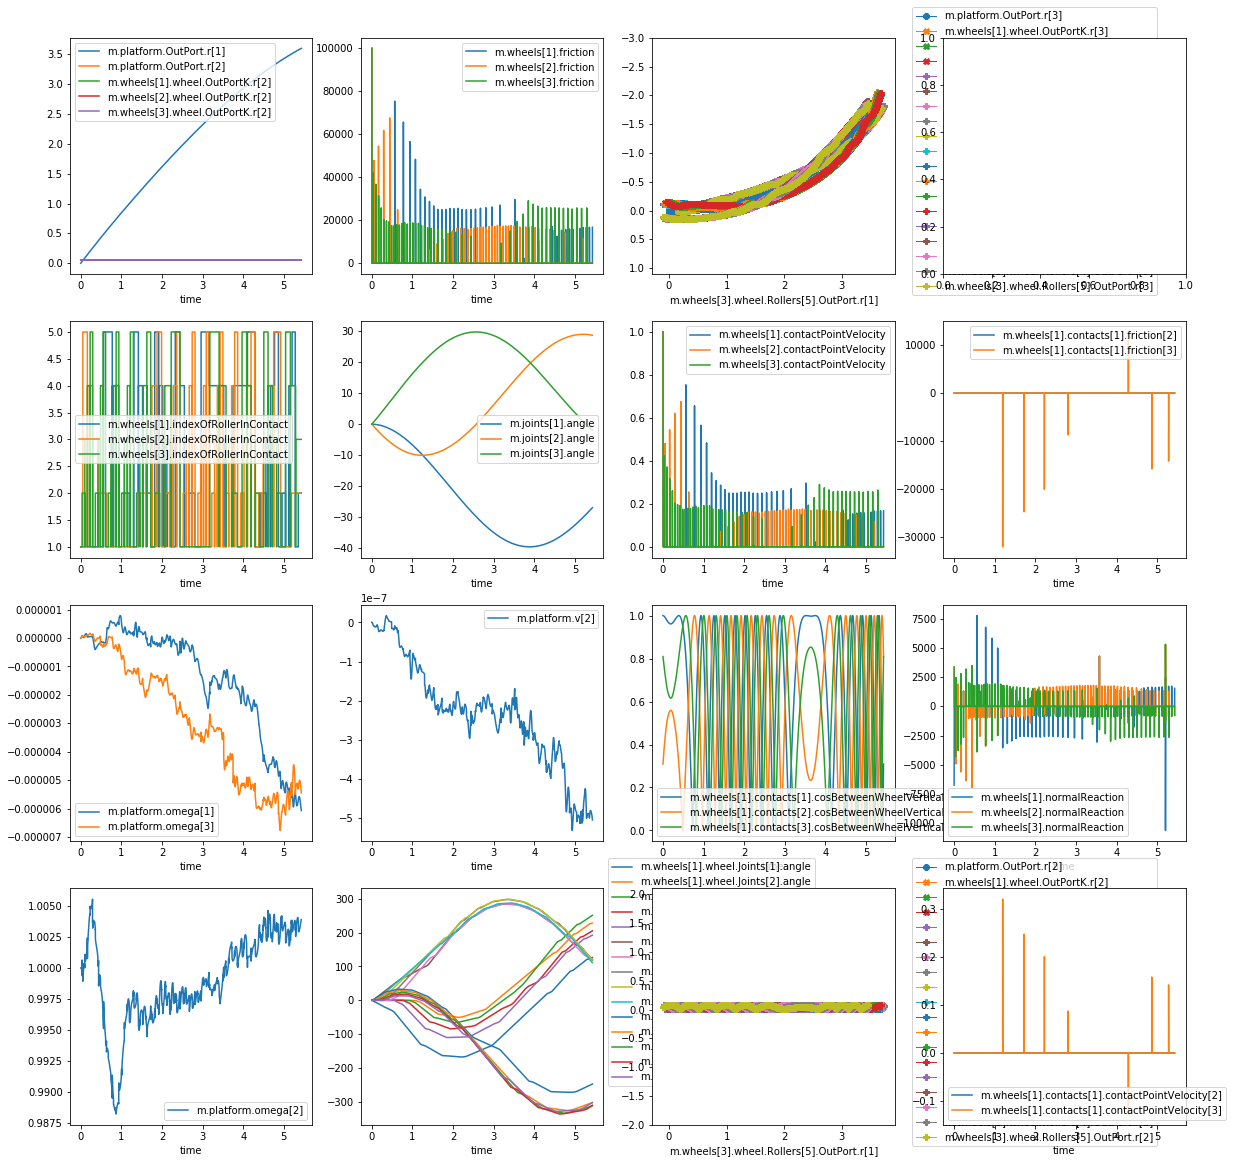

In [9]:
fig, axs = plt.subplots(4, 4, figsize = (20, 20))

wheels_r2 = res[
    [ 'time'
    , 'm.platform.OutPort.r[1]'
    , 'm.platform.OutPort.r[2]'
    , 'm.wheels[1].wheel.OutPortK.r[2]'
    , 'm.wheels[2].wheel.OutPortK.r[2]'
    , 'm.wheels[3].wheel.OutPortK.r[2]'
    ]
]

wheels_friction = res[
    [ 'time'
    , 'm.wheels[1].friction'
    , 'm.wheels[2].friction'
    , 'm.wheels[3].friction'
    ]
]

platform_center_df = [
    res[
        [ center[0], center[2] ]
    ]
    for center in [ platform_center ]
]
wheel_centers_dfs = [
    res[
        [ center[0], center[2] ]
    ]
    for center in wheel_centers
]
roller_centers_dfs = [
    res[
        [ center[0], center[2] ]
    ]
    for center in roller_centers
]

index_of_roller_in_contact = res[
    [ 'time'
    , 'm.wheels[1].indexOfRollerInContact'
    , 'm.wheels[2].indexOfRollerInContact'
    , 'm.wheels[3].indexOfRollerInContact'
    ]
]

joint_angles = res[
    [ 'time'
    , 'm.joints[1].angle'
    , 'm.joints[2].angle'
    , 'm.joints[3].angle'
    ]
]

contact_point_velocities = res[
    [ 'time'
    , 'm.wheels[1].contactPointVelocity'
    , 'm.wheels[2].contactPointVelocity'
    , 'm.wheels[3].contactPointVelocity'
    ]
]

contacts_friction = res[
    [ 'time'
#     , 'm.wheels[1].contacts[1].friction[1]'
    , 'm.wheels[1].contacts[1].friction[2]'
    , 'm.wheels[1].contacts[1].friction[3]'
    ]
]

wheel_1_contact_point_velocity = res[
    [ 'time'
#     , 'm.wheels[1].contacts[1].contactPointVelocity[1]'
    , 'm.wheels[1].contacts[1].contactPointVelocity[2]'
    , 'm.wheels[1].contacts[1].contactPointVelocity[3]'
    ]
]

# normal_velocities = res[
#     [ 'time'
#     , 'm.wheels[1].normalVelocity'
#     , 'm.wheels[2].normalVelocity'
#     , 'm.wheels[3].normalVelocity'
#     ]
# ]

normal_reactions = res[
    [ 'time'
    , 'm.wheels[1].normalReaction'
    , 'm.wheels[2].normalReaction'
    , 'm.wheels[3].normalReaction'
    ]
]

platform_v_2 = res[
    [ 'time'
    , 'm.platform.v[2]'
    ]
]

platform_omega = res[
    [ 'time'
    , 'm.platform.omega[1]'
    , 'm.platform.omega[3]'
    ]
]

platform_omega_2 = res[
    [ 'time'
    , 'm.platform.omega[2]'
    ]
]

roller_angles = res[
    [ 'time' ]
    + 
    [ 'm.wheels[{0}].wheel.Joints[{1}].angle'.format(i, j)
    for i in range(1, NActual + 1)
    for j in range(1, nActual + 1)    
    ]
]

num_tail = 5000000

wheels_r2.tail(num_tail).plot(x = 'time', ax = axs[0][0])

wheels_friction.tail(num_tail).plot(x = 'time', ax = axs[0][1])

trajectory_axs = axs[0][2]
trajectory_axs.axis('equal')
trajectory_axs.invert_yaxis() # userward goes downward when looking from top
for i, center in enumerate([ platform_center ]):
    platform_center_df[i].tail(num_tail).plot(x = center[0], ax = trajectory_axs, linewidth = 1, marker = '8')
for i, center in enumerate(wheel_centers):
    wheel_centers_dfs[i].tail(num_tail).plot(x = center[0], ax = trajectory_axs, linewidth = 1, marker = 'X')
for i, center in enumerate(roller_centers):
    roller_centers_dfs[i].tail(num_tail).plot(x = center[0], ax = trajectory_axs, linewidth = 1, marker = 'P')
trajectory_axs.legend(bbox_to_anchor=(1.05, 1.15))

index_of_roller_in_contact.tail(num_tail).plot(x = 'time', ax = axs[1][0])

joint_angles.tail(num_tail).plot(x = 'time', ax = axs[1][1])

contact_point_velocities.tail(num_tail).plot(x = 'time', ax = axs[1][2])

contacts_friction.tail(num_tail).plot(x = 'time', ax = axs[1][3])

wheel_1_contact_point_velocity.tail(num_tail).plot(x = 'time', ax = axs[3][3])

# normal_velocities.plot(x = 'time', ax = axs[2][2])

res.tail(num_tail)[
    [ 'time'
    , 'm.wheels[1].contacts[1].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[1].contacts[2].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[1].contacts[3].cosBetweenWheelVerticalAndGlobalVertical'
    ]
].plot(x = 'time', ax = axs[2][2])

normal_reactions.tail(num_tail).plot(x = 'time', ax = axs[2][3])

platform_v_2.tail(num_tail).plot(x = 'time', ax = axs[2][1])

platform_omega.tail(num_tail).plot(x = 'time', ax = axs[2][0])

platform_omega_2.tail(num_tail).plot(x = 'time', ax = axs[3][0])

v_trajectory_axs = axs[3][2]
v_trajectory_axs.axis('equal')
for center in [ platform_center ]:
    res.tail(num_tail)[
        [ center[0], center[1] ]
    ].plot(x = center[0], ax = v_trajectory_axs, linewidth = 1, marker = '8')
for center in wheel_centers:
    res.tail(num_tail)[
        [ center[0], center[1] ]
    ].plot(x = center[0], ax = v_trajectory_axs, linewidth = 1, marker = 'X')
for center in roller_centers:
    res.tail(num_tail)[
        [ center[0], center[1] ]
    ].plot(x = center[0], ax = v_trajectory_axs, linewidth = 1, marker = 'P')
v_trajectory_axs.legend(bbox_to_anchor=(1.05, 1.15))

roller_angles.tail(num_tail).plot(x = 'time', ax = axs[3][1])
axs[3][1].legend(bbox_to_anchor=(1.0, 1.15))

print('Behold!')

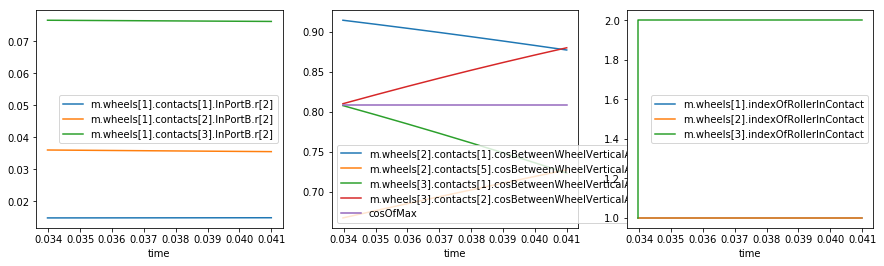

In [10]:
fig, axs = plt.subplots(1, 3, figsize = (15, 4))

t_min = 40
t_max = 50

res.iloc[t_min:t_max][
    [ 'time'
    , 'm.wheels[1].contacts[1].InPortB.r[2]'
    , 'm.wheels[1].contacts[2].InPortB.r[2]'
    , 'm.wheels[1].contacts[3].InPortB.r[2]'
    ]
].plot(x = 'time', ax = axs[0])

res.iloc[t_min:t_max].assign(cosOfMax = lambda row: np.cos(np.pi/5))[
    [ 'time'
#     , 'm.wheels[1].contacts[1].cosBetweenWheelVerticalAndGlobalVertical'
#     , 'm.wheels[1].contacts[2].cosBetweenWheelVerticalAndGlobalVertical'
#     , 'm.wheels[1].contacts[3].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[2].contacts[1].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[2].contacts[5].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[3].contacts[1].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[3].contacts[2].cosBetweenWheelVerticalAndGlobalVertical'
    , 'cosOfMax'
    ]
].plot(x = 'time', ax = axs[1])

res.iloc[t_min:t_max][
    [ 'time'
    , 'm.wheels[1].indexOfRollerInContact'
    , 'm.wheels[2].indexOfRollerInContact'
    , 'm.wheels[3].indexOfRollerInContact'
    ]
].plot(x = 'time', ax = axs[2])

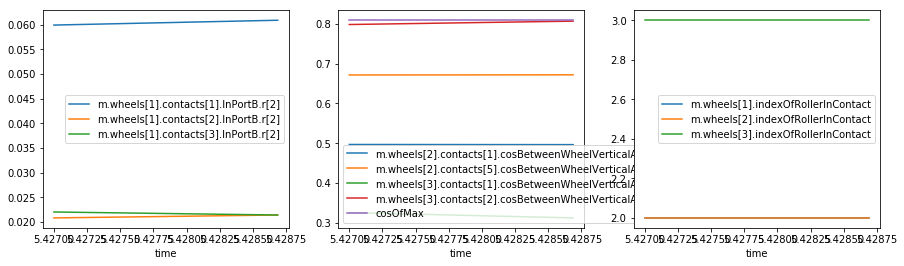

In [11]:
fig, axs = plt.subplots(1, 3, figsize = (15, 4))

t_min = len(res) - 4
t_max = len(res)

res.iloc[t_min:t_max][
    [ 'time'
    , 'm.wheels[1].contacts[1].InPortB.r[2]'
    , 'm.wheels[1].contacts[2].InPortB.r[2]'
    , 'm.wheels[1].contacts[3].InPortB.r[2]'
    ]
].plot(x = 'time', ax = axs[0])

res.iloc[t_min:t_max].assign(cosOfMax = lambda row: np.cos(np.pi/5))[
    [ 'time'
#     , 'm.wheels[1].contacts[1].cosBetweenWheelVerticalAndGlobalVertical'
#     , 'm.wheels[1].contacts[2].cosBetweenWheelVerticalAndGlobalVertical'
#     , 'm.wheels[1].contacts[3].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[2].contacts[1].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[2].contacts[5].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[3].contacts[1].cosBetweenWheelVerticalAndGlobalVertical'
    , 'm.wheels[3].contacts[2].cosBetweenWheelVerticalAndGlobalVertical'
    , 'cosOfMax'
    ]
].plot(x = 'time', ax = axs[1])

res.iloc[t_min:t_max][
    [ 'time'
    , 'm.wheels[1].indexOfRollerInContact'
    , 'm.wheels[2].indexOfRollerInContact'
    , 'm.wheels[3].indexOfRollerInContact'
    ]
].plot(x = 'time', ax = axs[2])

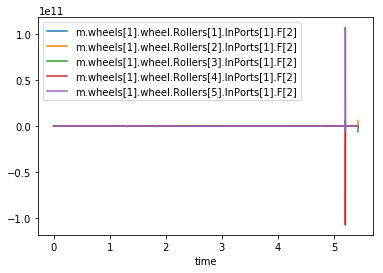

In [12]:
res[
    [ 'time'
#     , 'm.wheels[1].wheel.Wheel.InPorts[1].F[2]'
#     , 'm.wheels[2].wheel.Wheel.InPorts[1].F[2]'
#     , 'm.wheels[3].wheel.Wheel.InPorts[1].F[2]'
    , 'm.wheels[1].wheel.Rollers[1].InPorts[1].F[2]'
    , 'm.wheels[1].wheel.Rollers[2].InPorts[1].F[2]'
    , 'm.wheels[1].wheel.Rollers[3].InPorts[1].F[2]'
    , 'm.wheels[1].wheel.Rollers[4].InPorts[1].F[2]'
    , 'm.wheels[1].wheel.Rollers[5].InPorts[1].F[2]'
    ]
].plot(x = 'time')

behold ye!


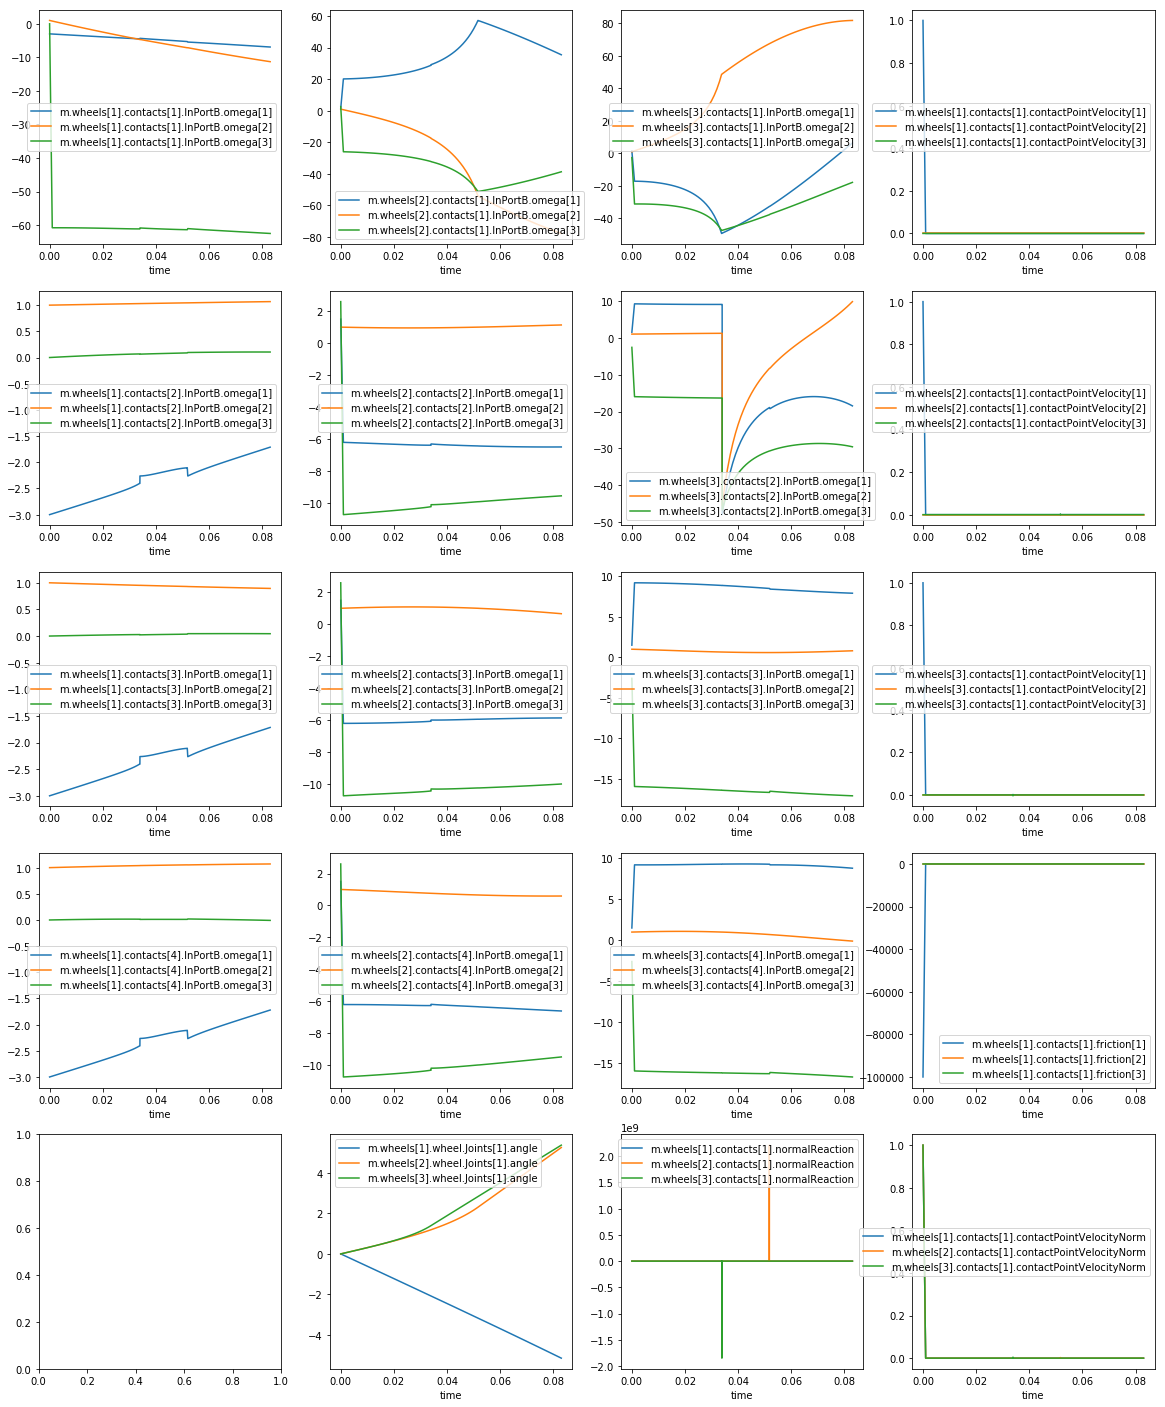

In [13]:
this_res = res.head(100)
# this_res = self_rot.head(100)
# this_res = at_rest.head(100)

fig, axs = plt.subplots(5, 4, figsize = (20, 25))

for i in range(1, NActual + 1):
    for j in range(1, nActual):
        this_res[
            [ 'time'
            , 'm.wheels[{0}].contacts[{1}].InPortB.omega[1]'.format(i, j)
            , 'm.wheels[{0}].contacts[{1}].InPortB.omega[2]'.format(i, j)
            , 'm.wheels[{0}].contacts[{1}].InPortB.omega[3]'.format(i, j)
            ]
        ].plot(x = 'time', ax = axs[j - 1][i - 1])
    this_res[
        [ 'time'
        , 'm.wheels[{0}].contacts[{1}].contactPointVelocity[1]'.format(i, 1)
        , 'm.wheels[{0}].contacts[{1}].contactPointVelocity[2]'.format(i, 1)
        , 'm.wheels[{0}].contacts[{1}].contactPointVelocity[3]'.format(i, 1)
        ]
    ].plot(x = 'time', ax = axs[i - 1][3])

this_res[
    [ 'time'
    , 'm.wheels[1].contacts[1].friction[1]'
    , 'm.wheels[1].contacts[1].friction[2]'
    , 'm.wheels[1].contacts[1].friction[3]'
    ]
].plot(x = 'time', ax = axs[3][3])

# this_res[
#     [ 'time'
#     , 'm.wheels[1].indexOfRollerInContact'
#     , 'm.wheels[2].indexOfRollerInContact'
#     , 'm.wheels[3].indexOfRollerInContact'
#     ]
# ].plot(x = 'time', ax = axs[4][3])

this_res[
    [ 'time'
    , 'm.wheels[1].contacts[1].contactPointVelocityNorm'
    , 'm.wheels[2].contacts[1].contactPointVelocityNorm'
    , 'm.wheels[3].contacts[1].contactPointVelocityNorm'
    ]
].plot(x = 'time', ax = axs[4][3])

this_res[
    [ 'time'
    , 'm.wheels[1].wheel.Joints[1].angle'
    , 'm.wheels[2].wheel.Joints[1].angle'
    , 'm.wheels[3].wheel.Joints[1].angle'
    ]
].plot(x = 'time', ax = axs[4][1])

this_res[
    [ 'time'
    , 'm.wheels[1].contacts[1].normalReaction'
    , 'm.wheels[2].contacts[1].normalReaction'
    , 'm.wheels[3].contacts[1].normalReaction'
    ]
].plot(x = 'time', ax = axs[4][2])

# this_res[
#     [ 'time'
#     , 'm.wheels[1].contacts[2].normalVelocity'
#     , 'm.wheels[2].contacts[2].normalVelocity'
#     , 'm.wheels[3].contacts[2].normalVelocity'
#     ]
# ].plot(x = 'time', ax = axs[4][0])

print('behold ye!')

In [1403]:
res[roller_centers[0]].head()

m.wheels[1].wheel.Rollers[1].OutPort.r[1]  \
0                                       0.15   
1                                       0.15   
2                                       0.15   
3                                       0.15   
4                                       0.15   

   m.wheels[1].wheel.Rollers[1].OutPort.r[2]  \
0                                   0.009549   
1                                   0.009549   
2                                   0.009549   
3                                   0.009549   
4                                   0.009549   

   m.wheels[1].wheel.Rollers[1].OutPort.r[3]  
0                               3.330669e-17  
1                               3.330671e-17  
2                               3.330678e-17  
3                               3.330694e-17  
4                               3.330711e-17

In [1404]:
res[[
    'm.wheels[1].wheel.Wheel.q[1]',
    'm.wheels[1].wheel.Wheel.q[2]',
    'm.wheels[1].wheel.Wheel.q[3]',
    'm.wheels[1].wheel.Wheel.q[4]'
]].head()

m.wheels[1].wheel.Wheel.q[1]  m.wheels[1].wheel.Wheel.q[2]  \
0                      0.707107                  0.000000e+00   
1                      0.707107                  6.408118e-22   
2                      0.707107                  3.325065e-21   
3                      0.707107                  9.242622e-21   
4                      0.707107                  1.531759e-20   

   m.wheels[1].wheel.Wheel.q[3]  m.wheels[1].wheel.Wheel.q[4]  
0                      0.707107                  0.000000e+00  
1                      0.707107                  6.408118e-22  
2                      0.707107                  3.325065e-21  
3                      0.707107                  9.242622e-21  
4                      0.707107                  1.531759e-20

In [1405]:
res[[
    'm.wheels[1].wheel.Wheel.r[1]',
    'm.wheels[1].wheel.Wheel.r[3]'
]].head()

m.wheels[1].wheel.Wheel.r[1]  m.wheels[1].wheel.Wheel.r[3]
0                          0.15                  3.330669e-17
1                          0.15                  3.330678e-17
2                          0.15                  3.330716e-17
3                          0.15                  3.330800e-17
4                          0.15                  3.330886e-17

In [1406]:
res[[
    'm.wheels[1].wheel.Wheel.T[1,3]',
    'm.wheels[1].wheel.Wheel.T[2,3]',
    'm.wheels[1].wheel.Wheel.T[3,3]'
]].head()

m.wheels[1].wheel.Wheel.T[1,3]  m.wheels[1].wheel.Wheel.T[2,3]  \
0                               1                    0.000000e+00   
1                               1                    6.849841e-34   
2                               1                   -2.332181e-33   
3                               1                    5.567292e-32   
4                               1                    1.166933e-31   

   m.wheels[1].wheel.Wheel.T[3,3]  
0                    2.220446e-16  
1                    2.220446e-16  
2                    2.220446e-16  
3                    2.220446e-16  
4                    2.220446e-16

In [1407]:
res[[
    'm.joints[2].nBi[1]',
    'm.joints[2].nBi[2]',
    'm.joints[2].nBi[3]'
]].head()

m.joints[2].nBi[1]  m.joints[2].nBi[2]  m.joints[2].nBi[3]
0                -0.5       -0.000000e+00           -0.866025
1                -0.5        5.776590e-35           -0.866025
2                -0.5       -3.347533e-32           -0.866025
3                -0.5       -1.468451e-31           -0.866025
4                -0.5       -2.641129e-31           -0.866025

In [1408]:
res[[
    'm.wheels[1].wheel.Rollers[1].r[1]',
    'm.wheels[1].wheel.Rollers[1].r[2]',
    'm.wheels[1].wheel.Rollers[1].r[3]'
]].head()

m.wheels[1].wheel.Rollers[1].r[1]  m.wheels[1].wheel.Rollers[1].r[2]  \
0                               0.15                           0.009549   
1                               0.15                           0.009549   
2                               0.15                           0.009549   
3                               0.15                           0.009549   
4                               0.15                           0.009549   

   m.wheels[1].wheel.Rollers[1].r[3]  
0                       3.330669e-17  
1                       3.330671e-17  
2                       3.330678e-17  
3                       3.330694e-17  
4                       3.330711e-17

In [1409]:
res[[
    'm.wheels[1].wheel.Rollers[2].r[1]',
    'm.wheels[1].wheel.Rollers[2].r[2]',
    'm.wheels[1].wheel.Rollers[2].r[3]'
]].head()

m.wheels[1].wheel.Rollers[2].r[1]  m.wheels[1].wheel.Rollers[2].r[2]  \
0                               0.15                             0.0375   
1                               0.15                             0.0375   
2                               0.15                             0.0375   
3                               0.15                             0.0375   
4                               0.15                             0.0375   

   m.wheels[1].wheel.Rollers[2].r[3]  
0                          -0.038471  
1                          -0.038471  
2                          -0.038471  
3                          -0.038471  
4                          -0.038471

In [1410]:
res[
    [ 'time'
    , 'm.wheels[1].indexOfRollerInContact'
    , 'm.wheels[2].indexOfRollerInContact'
    , 'm.wheels[3].indexOfRollerInContact'
    ]
].tail()

time  m.wheels[1].indexOfRollerInContact  \
998   0.998                                   1   
999   0.999                                   1   
1000  1.000                                   1   
1001  1.000                                   1   
1002  1.000                                   1   

      m.wheels[2].indexOfRollerInContact  m.wheels[3].indexOfRollerInContact  
998                                    1                                   1  
999                                    1                                   1  
1000                                   1                                   1  
1001                                   1                                   1  
1002                                   1                                   1

In [34]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(res.tail().transpose())

1177  \
time                                                1.074000e+00   
m.joints[1].angle                                  -7.629653e+00   
m.joints[2].angle                                  -9.871025e+00   
m.joints[3].angle                                   1.746768e+01   
m.joints[1].mu                                     -1.275330e+01   
m.joints[2].mu                                     -1.986147e+00   
m.joints[3].mu                                      1.469889e+01   
m.platform.omega[1]                                -1.313364e-06   
m.platform.omega[2]                                 9.954935e-01   
m.platform.omega[3]                                 7.522664e-07   
m.platform.q[1]                                     8.601834e-01   
m.platform.q[2]                                    -4.329845e-07   
m.platform.q[3]                                     5.099849e-01   
m.platform.q[4]                                     1.247315e-07   
m.platform.r[1]                                     9.023368e-01   
m.platform.r[2]                                     4.999991e-02   
m.platform.r[3]                                    -7.036865e-02   
m.wheels[1].wheel.Joints[1].angle                  -1.122868e+02   
m.wheels[1].wheel.Joints[2].angle                  -6.795326e-01   
m.wheels[1].wheel.Joints[3].angle                  -7.466086e+00   
m.wheels[1].wheel.Joints[4].angle                  -2.478416e+01   
m.wheels[1].wheel.Joints[5].angle                  -5.267666e+01   
m.wheels[2].wheel.Joints[1].angle                   8.563368e+01   
m.wheels[2].wheel.Joints[2].angle                   7.493762e+01   
m.wheels[2].wheel.Joints[3].angle                   9.193864e+01   
m.wheels[2].wheel.Joints[4].angle                   1.005365e+02   
m.wheels[2].wheel.Joints[5].angle                   1.019913e+02   
m.wheels[3].wheel.Joints[1].angle                   2.624054e+01   
m.wheels[3].wheel.Joints[2].angle                   2.288537e+01   
m.wheels[3].wheel.Joints[3].angle                   1.675620e+01   
m.wheels[3].wheel.Joints[4].angle                   1.087600e+01   
m.wheels[3].wheel.Joints[5].angle                   6.164203e+00   
m.wheels[1].wheel.Joints[1].mu                     -1.490657e+02   
m.wheels[1].wheel.Joints[2].mu                     -8.968530e+01   
m.wheels[1].wheel.Joints[3].mu                     -9.643807e+01   
m.wheels[1].wheel.Joints[4].mu                     -1.118453e+02   
m.wheels[1].wheel.Joints[5].mu                     -1.294292e+02   
m.wheels[2].wheel.Joints[1].mu                      6.990899e+01   
m.wheels[2].wheel.Joints[2].mu                      1.421139e+02   
m.wheels[2].wheel.Joints[3].mu                      1.308027e+02   
m.wheels[2].wheel.Joints[4].mu                      1.186581e+02   
m.wheels[2].wheel.Joints[5].mu                      1.055727e+02   
m.wheels[3].wheel.Joints[1].mu                     -5.186322e+01   
m.wheels[3].wheel.Joints[2].mu                     -4.877784e+01   
m.wheels[3].wheel.Joints[3].mu                     -2.443535e+01   
m.wheels[3].wheel.Joints[4].mu                     -3.234602e+01   
m.wheels[3].wheel.Joints[5].mu                     -4.311250e+01   
m.wheels[1].wheel.Rollers[1].omega[1]               1.481161e+02   
m.wheels[1].wheel.Rollers[1].omega[2]              -7.273540e+00   
m.wheels[1].wheel.Rollers[1].omega[3]               6.504749e+00   
m.wheels[1].wheel.Rollers[2].omega[1]               8.910778e+01   
m.wheels[1].wheel.Rollers[2].omega[2]               6.759987e+00   
m.wheels[1].wheel.Rollers[2].omega[3]               7.077213e+00   
m.wheels[1].wheel.Rollers[3].omega[1]               9.703076e+01   
m.wheels[1].wheel.Rollers[3].omega[2]               9.331225e+00   
m.wheels[1].wheel.Rollers[3].omega[3]               2.948707e+00   
m.wheels[1].wheel.Rollers[4].omega[1]               1.127891e+02   
m.wheels[1].wheel.Rollers[4].omega[2]              -3.628876e+00   
m.wheels[1].wheel.Rollers[4].omega[3]           

In [37]:
res.tail()[
    [ 'm.wheels[1].wheel.Wheel.v[2]'
    , 'm.wheels[2].wheel.Wheel.v[2]'
    , 'm.wheels[3].wheel.Wheel.v[2]'
    , 'm.wheels[1].wheel.Wheel.r[2]'
    , 'm.wheels[2].wheel.Wheel.r[2]'
    , 'm.wheels[3].wheel.Wheel.r[2]'
    ]
]

m.wheels[1].wheel.Wheel.v[2]  m.wheels[2].wheel.Wheel.v[2]  \
1177                 -1.080253e-07                 -2.231934e-07   
1178                 -1.065327e-07                 -2.233792e-07   
1179                 -1.052988e-07                 -2.236678e-07   
1180                 -1.046422e-07                 -2.238329e-07   
1181                 -1.046422e-07                 -2.238329e-07   

      m.wheels[3].wheel.Wheel.v[2]  m.wheels[1].wheel.Wheel.r[2]  \
1177                  5.930576e-08                          0.05   
1178                  5.992286e-08                          0.05   
1179                  6.041642e-08                          0.05   
1180                  6.062311e-08                          0.05   
1181                  6.062311e-08                          0.05   

      m.wheels[2].wheel.Wheel.r[2]  m.wheels[3].wheel.Wheel.r[2]  
1177                          0.05                          0.05  
1178                          0.05                          0.05  
1179                          0.05                          0.05  
1180                          0.05                          0.05  
1181                          0.05                          0.05

### Master algorithm

In [168]:
ma_res = pd.read_csv('/home/vf/om/models/omni/tmp/Master_res.csv')

In [169]:
ma_res = ma_res # .head(150)

In [170]:
len(ma_res)

506

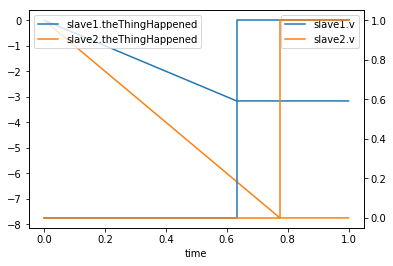

In [171]:
fig, ax = plt.subplots()

ma_res[
    [ 'time'
    , 'slave1.v'
    , 'slave2.v'
    ]
].plot(x = 'time', ax = ax)

ax1 = ax.twinx()
ma_res[
    [ 'time'
    , 'slave1.theThingHappened'
    , 'slave2.theThingHappened'
    ]
].plot(x = 'time', ax = ax1)

### ===================

# OM

In [ ]:
import OMPython
from OMPython import OMCSessionZMQ

In [ ]:
help(OMPython)

In [2]:
omc = OMCSessionZMQ()

2018-09-15 11:37:09,526 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.vf.port.0f9aeff4836b415db2f5d0b70a221f1d pid=22247


In [3]:
omc.sendExpression("cd()")

'/home/vf/om/models/omni'

In [7]:
omc.sendExpression('cd("tmp")')
omc.sendExpression("cd()")

'/home/vf/om/models/omni/tmp'

In [4]:
omc.sendExpression('loadModel(Modelica)')

True

In [5]:
root = '/home/vf/om/models/omni/thin/MBS'
path_MBS = root + '/package.mo'
path_MBS_Basics = root + '/Basics.mo'
paths = [
    path_MBS,
    path_MBS_Basics,
]
display(paths)

['/home/vf/om/models/omni/thin/MBS/package.mo',
 '/home/vf/om/models/omni/thin/MBS/Basics.mo']

In [12]:
omc.sendExpression('loadFile("' + path_MBS + '")')

False

In [ ]:
sim = omc.sendExpression('simulate(A, outputFormat="csv")')

In [ ]:
sim

In [ ]:
!mv {sim['resultFile']} .

In [ ]:
ls

In [ ]:
res = pd.read_csv('A_res.csv')

In [ ]:
res.hist()

In [ ]:
res['x'].plot()

In [ ]:
res['der(x)'].plot()